# Lake Koka Study Notebook

In [1]:
import ee
ee.Initialize()

In [2]:
from util import *

## Figure 1-a

In [3]:
date = ee.Date('2022-01-01')
geom = ee.Geometry.Point(39.02825127811424,8.365407583426938)

In [4]:
dataset = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017');
ethiopiaBorder = dataset.filter(ee.Filter.eq('country_na', 'Ethiopia'));

In [5]:
center = ee.Geometry.Point(39.02825127811424,8.365407583426938)

# MODIS/006/MOD09GA
MOD09GA = ee.ImageCollection('MODIS/061/MOD09A1')

# 500m, bands 3-7, MOD09GA dataset
# band5: 1230 - 1250 SWIR for FAI compute
# band6: 1640nm SWIR for atmospheric correction
# band7: 2130nm SWIR for atmospheric correction
TerraGA = MOD09GA.filterBounds(center)\
  .filter(ee.Filter().Or(
    ee.Filter.date('2022-02-02', '2022-02-03') 
    )).select(['sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b04', 'sur_refl_b05','sur_refl_b06','sur_refl_b07'], 
  ['b01', 'b02', 'b03',  'b04', 'b05', 'b06','b07'])

<Figure size 1500x1000 with 0 Axes>

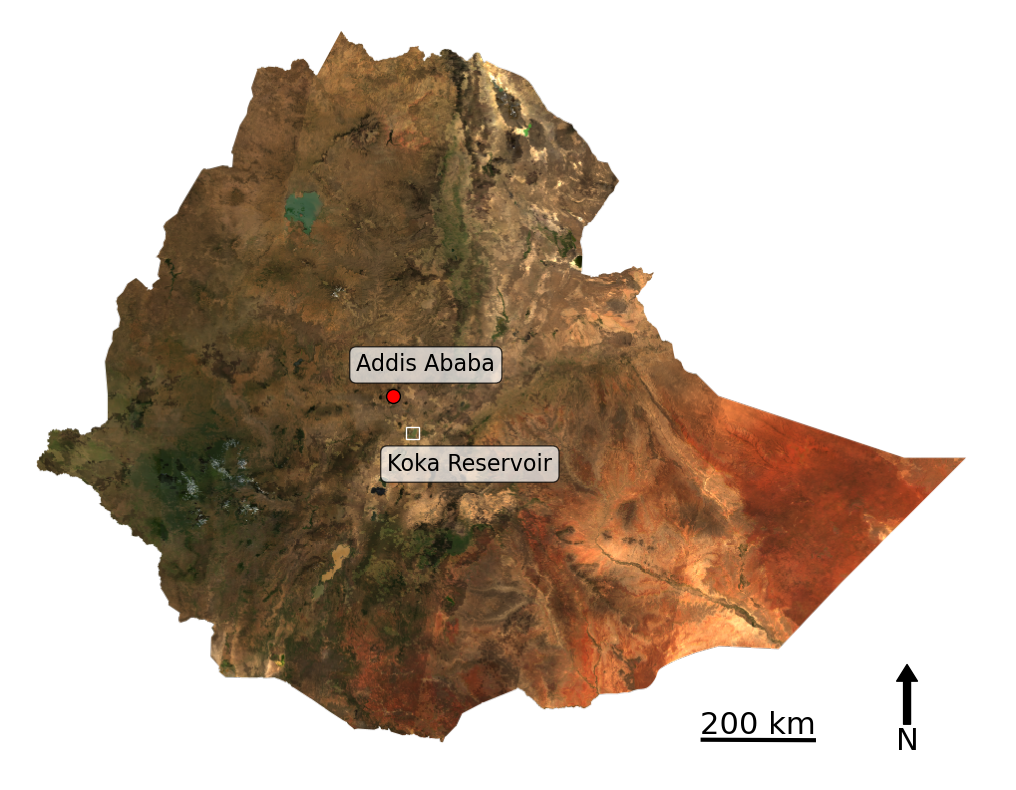

In [6]:
zoom_region = [48.66, 2.80, 32.57, 15.23]

fig = plt.figure(figsize=(15, 10))

VisParams = {
  'min': 0,
  'max': 0.3,
  'bands': ['b01', 'b04', 'b03'],
};

fig = plt.figure(figsize=(15, 10))

ax = cartoee.get_map(TerraGA.first().clip(ethiopiaBorder).divide(10000), region=zoom_region, vis_params=VisParams)

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

ax.scatter(38.757951218728614, 9.006017586621685, marker='o', color='red', s=100, edgecolors='k',
                transform=ccrs.Geodetic())

ax.text(38, 9.5, "Addis Ababa", fontsize=16,
            verticalalignment='center', horizontalalignment='left',
            transform=text_transform,
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

ax.text(38.5, 7.9, "Koka Reservoir", fontsize=16,
            verticalalignment='center', horizontalalignment='left',
            transform=text_transform,
            bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))


ax.axis('off')
vertices = []
codes = []

codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
vertices = [(38.97, 8.3), (38.97, 8.5), (39.175, 8.5), (39.175, 8.3), (0, 0)]

path = Path(vertices, codes)

pathpatch = PathPatch(path, facecolor='none', edgecolor='white')

ax.add_patch(pathpatch)



# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.15), text_color="black", arrow_color="black", fontsize=22
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=200, xy=(0.75, 0.05), fontsize=22, color="black", unit="km"
)

## Figure 1-b

In [7]:
bounds = ee.Geometry.Polygon(
[
    [
        [39.1135565227658,8.424602432271165],
        [39.02566610223424,8.424602432271165],
        [39.025665915773835,8.424602434807442],
        [39.02566589776578,8.424602432271165],
        [38.93777547723424,8.424602432271165],
        [38.93777529077385,8.424602434807442],
        [38.9377752727658,8.424602432271163],
        [38.85079445273555,8.42460253233351],
        [38.85079433831034,8.375796017098622],
        [38.937775374998715,8.375795917600394],
        [39.02566600000253,8.375795917600394],
        [39.11355662499788,8.375795917600392],
        [39.200537661689694,8.375796017098622],
        [39.20053754726449,8.42460253233351],
        [39.11355672723424,8.424602432271163],
        [39.11355654077384,8.424602434807442],
        [39.1135565227658,8.424602432271165]
            ]
])

In [8]:
startDate = '2017-09-21'
endDate = '2017-09-24'

In [9]:
maskedImage_l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .map(maskL8sr)

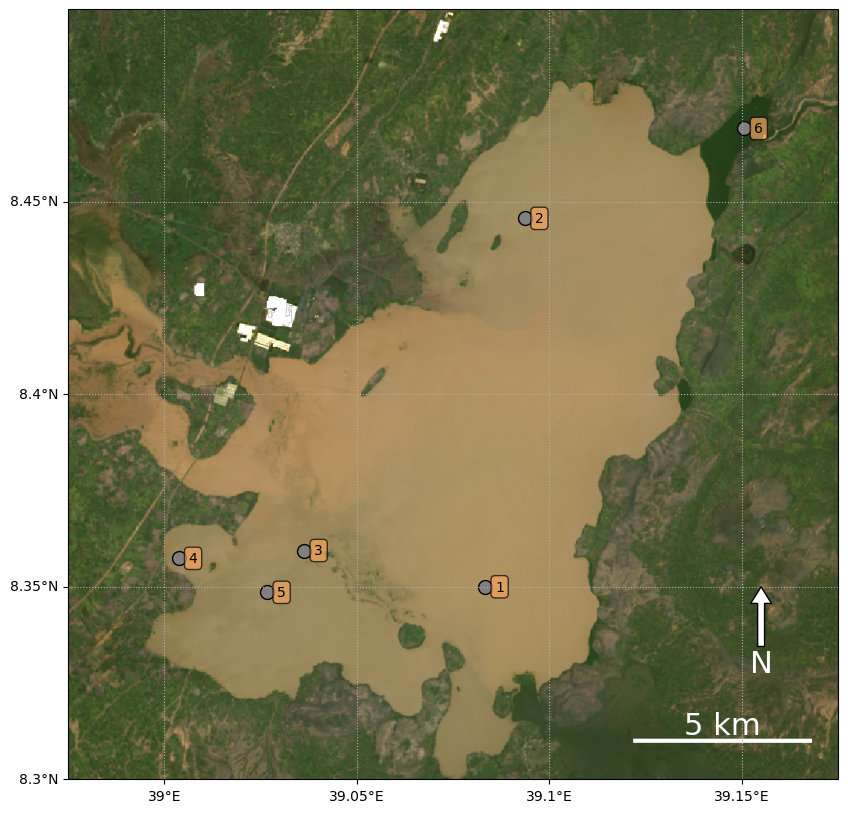

In [10]:
withWater_l8 = addWater_l8(maskedImage_l8, startDate, endDate, bounds)

fig = plt.figure(figsize=(15, 10))

region = [39.175, 8.3, 38.975, 8.5]

VisParams = {
  'min': 0,
  'max': 0.3,
  'gamma': 1.2,
  'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
};


ax = cartoee.get_map(maskedImage_l8, region=region, vis_params=VisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")


coordinates = [[39.00371688842954,8.357381960240502], [39.026719512941256,8.348550260536442],
               [39.15065902710141,8.469050624662039], [39.083333, 8.35], [39.09366744,8.445687],
               [39.03633255005063,8.359420016394715]]

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

number_list = [4,5,6,1,2,3]

for i in range(len(coordinates)):
    ax.scatter(coordinates[i][0], coordinates[i][1], marker='o', color='gray', s=100, edgecolors='k',
            transform=ccrs.Geodetic())
    
    site_number = number_list[i]
    longitude = coordinates[i][0]
    latitude = coordinates[i][1]
    ax.text(longitude, latitude, str(site_number),
                verticalalignment='center', horizontalalignment='left',
                transform=text_transform,
                bbox=dict(facecolor='sandybrown', alpha=0.7, boxstyle='round'))

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="white", arrow_color="white", fontsize=22
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05), fontsize=22, color="white", unit="km"
)

## Figure 2-a

In [11]:
gsw = ee.Image("JRC/GSW1_3/GlobalSurfaceWater")
occurrence = gsw.select('occurrence')

lake_koka_entire = ee.Geometry.Polygon([
        [
            [
                39.0, 8.5
            ],
            [
                39.0, 8.3
            ],
            [
                39.18, 8.3
            ],
            [
                39.18, 8.5
            ],
            [
                39.0, 8.5
            ]
        ]
    ])
feature = ee.Feature(lake_koka_entire, {})
roi = feature.geometry()

water_mask = occurrence.gt(50).clip(roi).selfMask()

jrc_fc = ras_to_vec_S2(water_mask, geom)
fc_largest = jrc_fc.limit(1, 'area', False)

before filterBounds 29
after filterBounds 1


In [12]:
startDate = '2018-12-15'
endDate = '2018-12-16'

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
    .map(cloudMasking_S2_otsu)

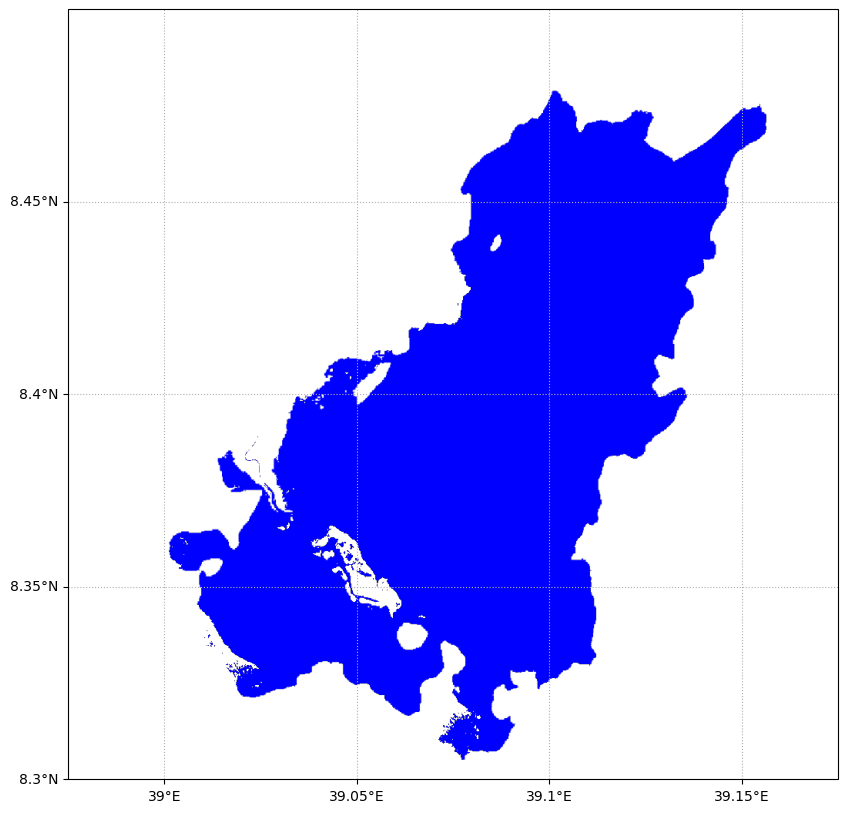

In [13]:
fig = plt.figure(figsize=(15, 10))

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)

# print(withWater.select('water'))
waterVisParams = {
  'min': 0,
  'max': 1,
  'palette': ['Blue']
};

# use cartoee to get a map
ax = cartoee.get_map(withWater.select('water').clip(fc_largest.geometry()), region=region, vis_params=waterVisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")


In [14]:
# seed: 123 & 2
randomPoints = ee.FeatureCollection.randomPoints(withWater.select('water').clip(fc_largest.geometry()).geometry(), 100, 123)
randomPoints2 = ee.FeatureCollection.randomPoints(withWater.select('water').clip(fc_largest.geometry()).geometry(), 40, 2)

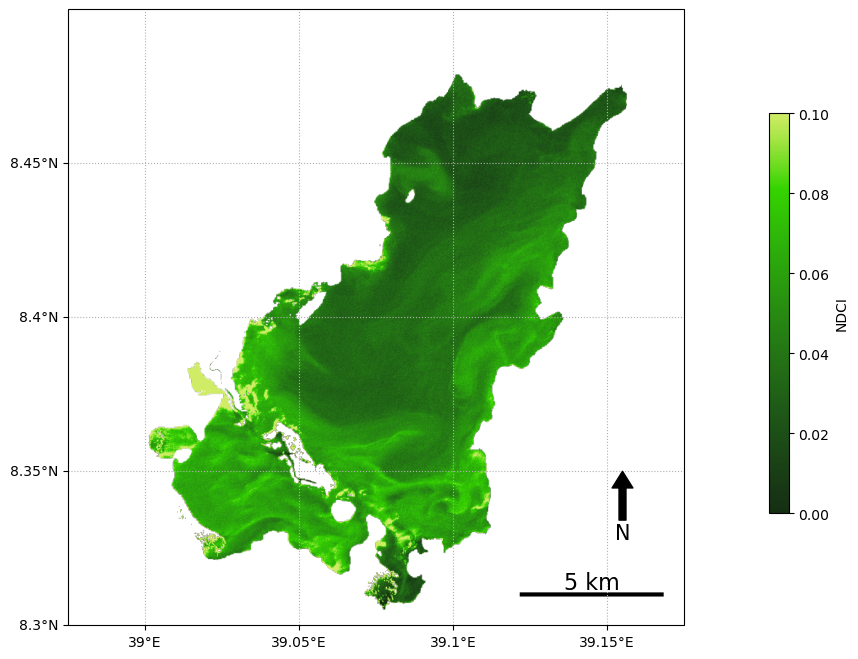

In [15]:
S2_BANDS_2 = ['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B2', 'QA60', 'water']

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate, endDate)\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

NDCI = updatedMaskedImage.normalizedDifference(['B5', 'B4'])
mask = withWater.select('water').gt(0);
NDCIMask = NDCI.updateMask(mask).clip(fc_largest.geometry());

VisParam={
    'min':0.0,
    'max':0.1,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(NDCIMask, region=region, vis_params=VisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

cartoee.add_colorbar(
    ax, VisParam, loc="right", label="NDCI", orientation="vertical"
)

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black", fontsize=15
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05), fontsize=16, color="black", unit="km"
)

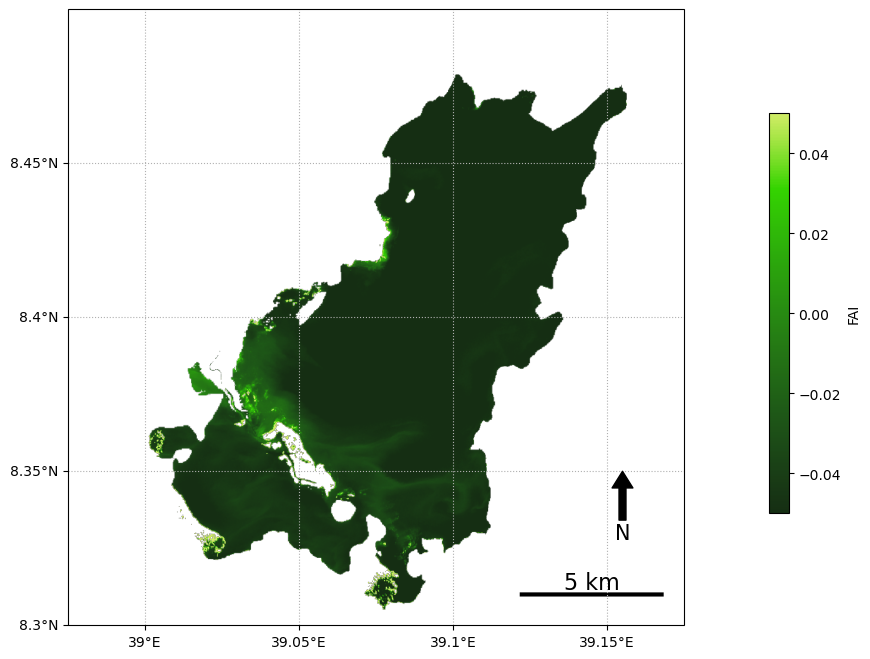

In [16]:
withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

FAI = updatedMaskedImage.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
    {'RED': updatedMaskedImage.select('B4'),'NIR': updatedMaskedImage.select('B8'), 
    'SWIR': updatedMaskedImage.select('B11')});

mask = withWater.select('water').gt(0);
FAIMask = FAI.updateMask(mask).clip(fc_largest.geometry());


VisParam={
    'min':-0.05,
    'max':0.05,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(FAIMask, region=region, vis_params=VisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

cartoee.add_colorbar(
    ax, VisParam, loc="right", label="FAI", orientation="vertical"
)

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black", fontsize=15
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05), fontsize=16, color="black", unit="km"
)

In [17]:
L8_BANDS = ['SR_B6', 'SR_B5', 'SR_B3', 'SR_B4', 'SR_B2', 'SR_B1', 'water']
startDate = '2018-12-15'
endDate = '2018-12-16'

L8ImageCollection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUD_COVER', 'less_than', 20)\
    .map(maskL8sr)


withWater_l8 = addWater_l8(L8ImageCollection, startDate, endDate, bounds)
updatedMaskedImage_l8 = withWater_l8.select(L8_BANDS)

FAI_l8 = updatedMaskedImage_l8.expression('1.0*NIR-(RED+(SWIR-RED)*((865.0-654.5) / (1608.5-654.5)))',
    {'RED': updatedMaskedImage_l8.select('SR_B4'),'NIR': updatedMaskedImage_l8.select('SR_B5'), 
    'SWIR': updatedMaskedImage_l8.select('SR_B6')})


mask_l8 = withWater_l8.select('water').gt(0);
FAIMask_l8 = FAI_l8.updateMask(mask_l8).clip(fc_largest.geometry());

#-------------------------------------------------------------------
Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate, endDate)\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

FAI = updatedMaskedImage.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
    {'RED': updatedMaskedImage.select('B4'),'NIR': updatedMaskedImage.select('B8'), 
    'SWIR': updatedMaskedImage.select('B11')});

mask = withWater.select('water').gt(0);
FAIMask = FAI.updateMask(mask_l8).clip(fc_largest.geometry());

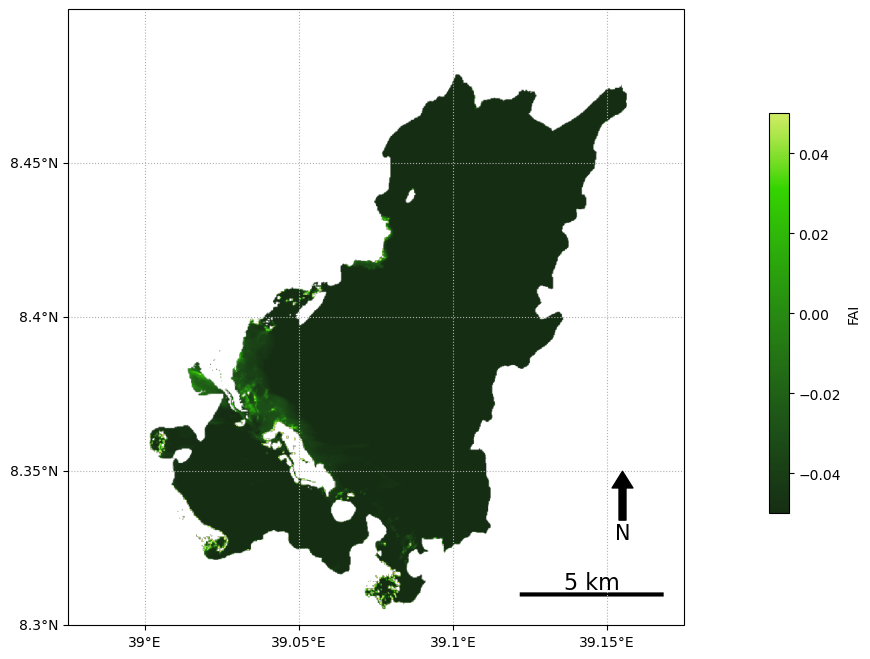

In [18]:
VisParam={
    'min':-0.05,
    'max':0.05,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(FAIMask_l8, region=region, vis_params=VisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

cartoee.add_colorbar(
    ax, VisParam, loc="right", label="FAI", orientation="vertical"
)

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black", fontsize=15
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05), fontsize=16, color="black", unit="km"
)


In [19]:
fai_sampling = FAIMask.sampleRegions(
        randomPoints, ['FAI'], 20.0, 'EPSG:4326', 1, True)

fai_l8_sampling = FAIMask_l8.sampleRegions(
        randomPoints, ['FAI'], 30.0, 'EPSG:4326', 1, True)
                                                                                                                                                                                        
fai_list = ee.Dictionary(fai_sampling.reduceColumns(**{
  'reducer': ee.Reducer.toList(), 
  'selectors': ['constant']
})).get('list').getInfo()

fai_l8_list = ee.Dictionary(fai_l8_sampling.reduceColumns(**{
  'reducer': ee.Reducer.toList(), 
  'selectors': ['constant']
})).get('list').getInfo()

FAI_df_s2_1 = np.array(fai_list)
FAI_df_l8_1 = np.array(fai_l8_list)

In [20]:
startDate = '2019-10-31'
endDate = '2019-11-01'

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate, endDate)\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

FAI = updatedMaskedImage.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
    {'RED': updatedMaskedImage.select('B4'),'NIR': updatedMaskedImage.select('B8'), 
    'SWIR': updatedMaskedImage.select('B11')});

mask = withWater.select('water').gt(0);
FAIMask = FAI.updateMask(mask).clip(fc_largest.geometry());

#------------------------------------------------------------------

L8ImageCollection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUD_COVER', 'less_than', 20)\
    .map(maskL8sr)


withWater_l8 = addWater_l8(L8ImageCollection, startDate, endDate, bounds)
updatedMaskedImage_l8 = withWater_l8.select(L8_BANDS)

FAI_l8 = updatedMaskedImage_l8.expression('1.0*NIR-(RED+(SWIR-RED)*((865.0-654.5) / (1608.5-654.5)))',
    {'RED': updatedMaskedImage_l8.select('SR_B4'),'NIR': updatedMaskedImage_l8.select('SR_B5'), 
    'SWIR': updatedMaskedImage_l8.select('SR_B6')})


mask_l8 = withWater_l8.select('water').gt(0);
FAIMask_l8 = FAI_l8.updateMask(mask).clip(fc_largest.geometry());

fai_sampling_2 = FAIMask.sampleRegions(
        randomPoints, ['FAI'], 20.0, 'EPSG:4326', 1, True)

fai_l8_sampling_2 = FAIMask_l8.sampleRegions(
        randomPoints, ['FAI'], 30.0, 'EPSG:4326', 1, True)
                                                                                                                                                                                        

fai_list_2 = ee.Dictionary(fai_sampling_2.reduceColumns(**{
  'reducer': ee.Reducer.toList(), 
  'selectors': ['constant']
})).get('list').getInfo()

fai_l8_list_2 = ee.Dictionary(fai_l8_sampling_2.reduceColumns(**{
  'reducer': ee.Reducer.toList(), 
  'selectors': ['constant']
})).get('list').getInfo()


FAI_df_s2_2 = np.array(fai_list_2)
FAI_df_l8_2 = np.array(fai_l8_list_2)

In [21]:
df_FAI_merged = pd.DataFrame({'FAI_MSI':FAI_df_s2_2 ,'FAI_OLI': FAI_df_l8_2})
df_FAI_merged

FAI_MSI   FAI_OLI
0  -0.048077 -0.055263
1  -0.067008 -0.080112
2  -0.056851 -0.069556
3  -0.068523 -0.067742
4  -0.064030 -0.077974
..       ...       ...
94 -0.063244 -0.078724
95 -0.053280 -0.068561
96 -0.064751 -0.078722
97 -0.053585 -0.069721
98 -0.065391 -0.078751

[99 rows x 2 columns]

In [22]:
FAI_random_points_s2 = np.concatenate((\
                         FAI_df_s2_1,
                         FAI_df_s2_2,
                        ), axis=0)

FAI_random_points_l8 = np.concatenate((\
                         FAI_df_l8_1,
                         FAI_df_l8_2,              
                        ), axis=0)

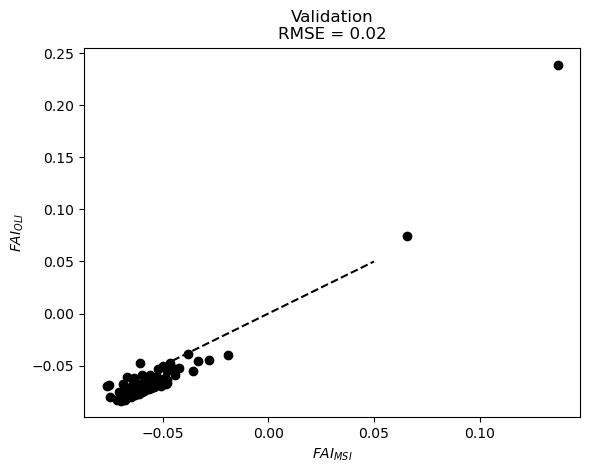

In [23]:
rmse = np.sqrt(np.mean((FAI_df_s2_2 - FAI_df_l8_2)**2))

plt.xlabel('$FAI_{MSI}$ ')
plt.ylabel('$FAI_{OLI}$')
plt.title(f'Validation\nRMSE = {round(rmse, 2)}')
plt.scatter(FAI_df_s2_2, FAI_df_l8_2, color='k')
x_vals = np.linspace(-0.05,0.05,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k--');

In [24]:
df_FAI_merged_updated = pd.DataFrame({'FAI_MSI':FAI_random_points_l8 ,'FAI_OLI': FAI_random_points_s2})
df_FAI_merged_updated = df_FAI_merged_updated.drop(df_FAI_merged_updated[(df_FAI_merged_updated['FAI_MSI'] > 0.05) | (df_FAI_merged_updated['FAI_OLI'] > 0.05)].index)
df_FAI_merged_updated[df_FAI_merged_updated['FAI_MSI'] > 0.05]

Empty DataFrame
Columns: [FAI_MSI, FAI_OLI]
Index: []

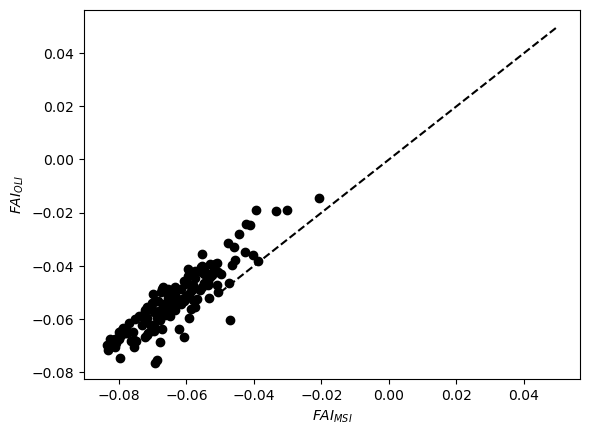

In [25]:
plt.xlabel('$FAI_{MSI}$ ')
plt.ylabel('$FAI_{OLI}$')

plt.scatter(df_FAI_merged_updated['FAI_MSI'], df_FAI_merged_updated['FAI_OLI'], color='k')
x_vals = np.linspace(-0.05,0.05,100)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k--');

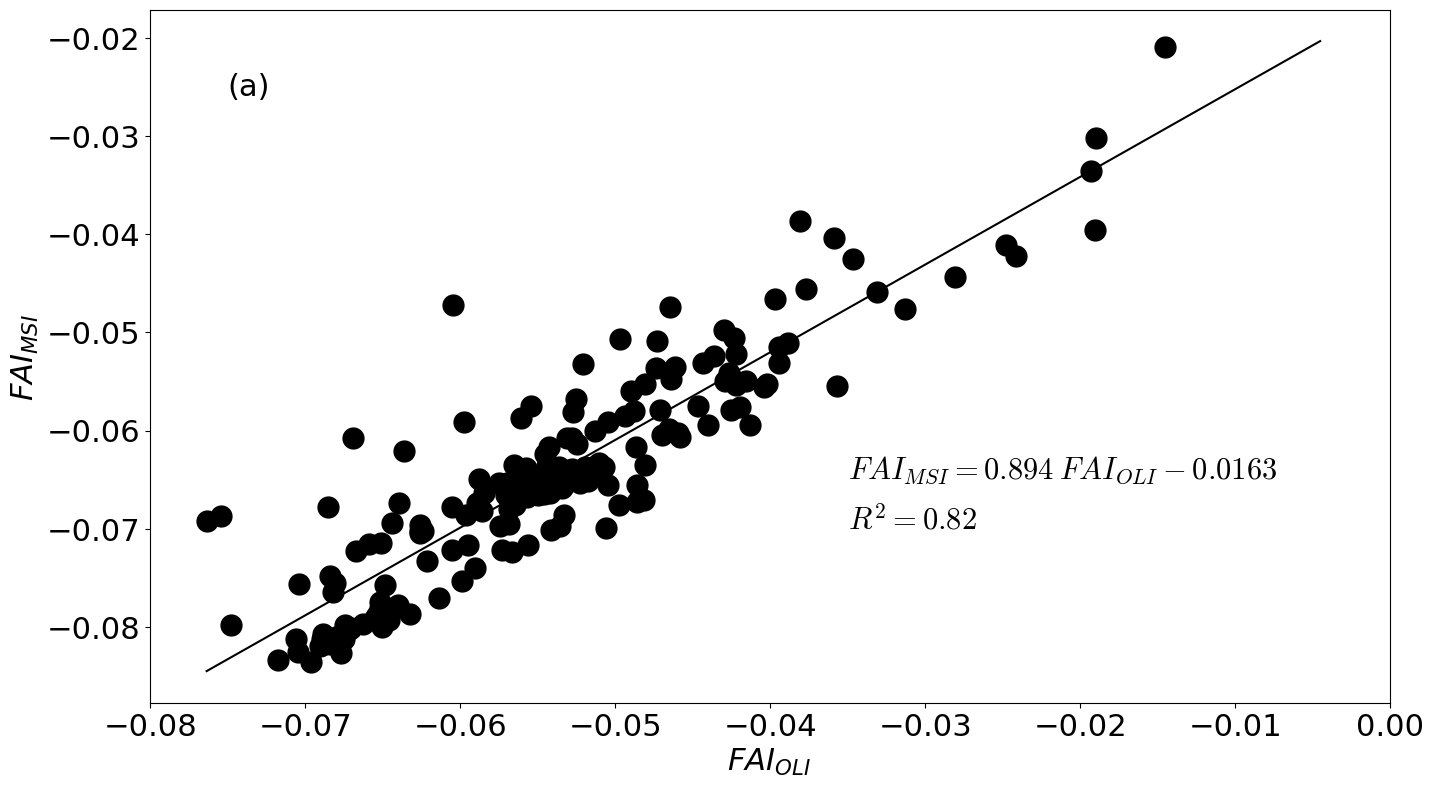

In [26]:
plt.rcParams.update({'font.size': 22})
satellite_data = df_FAI_merged_updated['FAI_OLI']
insitu_data = df_FAI_merged_updated['FAI_MSI']

popt, pcov = curve_fit(func_linear, satellite_data, insitu_data)

vec_algorithm = np.vectorize(lambda data: linear_algorithm(data, popt))
Yhat = vec_algorithm(satellite_data)
Y = insitu_data

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1-d1.dot(d1)/d2.dot(d2)

fig, ax = plt.subplots(figsize=(16,9))
t = np.linspace(np.min(satellite_data),np.max(satellite_data)+0.01,100)

ax.set_xlabel('$FAI_{OLI}$ ')
ax.set_ylabel('$FAI_{MSI}$ ')
ax.set_xlim(-0.08,0.0)
ax.plot(satellite_data,  insitu_data, 'ko', ms=15)
ax.plot(t, func_linear(t, *popt), 'k-')

ax.text(-0.075, -0.025, "(a)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')

msg = (r"$FAI_{MSI} = 0.894\:FAI_{OLI} - 0.0163$")
msg2 = r"$R^2 = 0.82$"

# Set the text in the plot.
ax.text(-0.035, -0.065, msg, size=22, math_fontfamily='cm')
ax.text(-0.035, -0.070, msg2, size=22, math_fontfamily='cm');

## Figure 2-b

In [27]:
startDate_list = ['2019-01-09', '2019-01-14', '2019-02-13',
            '2019-03-15',  '2019-04-14', '2019-04-29',
            '2019-05-04', '2019-05-19', '2019-06-13',
            '2019-09-01', '2019-10-21', '2019-11-15', ]

endDate_list = ['2019-01-10','2019-01-15', '2019-02-14',
           '2019-03-16',  '2019-04-15', '2019-04-30',
            '2019-05-05', '2019-05-20', '2019-06-14', 
            '2019-09-02', '2019-10-22', '2019-11-16']

FAI_df_sentinel2 = []
NDCI_df_sentinel2 = []

for i in range(len(startDate_list)):
    print('processing data no.', i)
    Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate_list[i], endDate_list[i])\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

    # NDCI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    NDCI = updatedMaskedImage.normalizedDifference(['B5', 'B4'])
    mask = withWater.select('water').gt(0);
    NDCIMask = NDCI.updateMask(mask).clip(fc_largest.geometry());
    
     # FAI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    FAI = updatedMaskedImage.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
        {'RED': updatedMaskedImage.select('B4'),'NIR': updatedMaskedImage.select('B8'), 
        'SWIR': updatedMaskedImage.select('B11')});

    mask = withWater.select('water').gt(0);
    FAIMask = FAI.updateMask(mask).clip(fc_largest.geometry());

    ndci_sampling = NDCIMask.sampleRegions(
            randomPoints2, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    fai_sampling = FAIMask.sampleRegions(
            randomPoints2, ['FAI'], 20.0, 'EPSG:4326', 1, True)

    # get values of 100 pixels                                                                                                 
    ndci_list = ee.Dictionary(ndci_sampling.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    fai_list = ee.Dictionary(fai_sampling.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    print('Date', startDate_list[i], '# of ndci data points: ', len(ndci_list), ', # of fai data points: ', len(fai_list))

    FAI_df_sentinel2.append(fai_list)
    NDCI_df_sentinel2.append(ndci_list)

processing data no. 0
Date 2019-01-09 # of ndci data points:  39 , # of fai data points:  39
processing data no. 1
Date 2019-01-14 # of ndci data points:  37 , # of fai data points:  37
processing data no. 2
Date 2019-02-13 # of ndci data points:  36 , # of fai data points:  36
processing data no. 3
Date 2019-03-15 # of ndci data points:  34 , # of fai data points:  34
processing data no. 4
Date 2019-04-14 # of ndci data points:  32 , # of fai data points:  32
processing data no. 5
Date 2019-04-29 # of ndci data points:  32 , # of fai data points:  32
processing data no. 6
Date 2019-05-04 # of ndci data points:  32 , # of fai data points:  32
processing data no. 7
Date 2019-05-19 # of ndci data points:  27 , # of fai data points:  27
processing data no. 8
Date 2019-06-13 # of ndci data points:  30 , # of fai data points:  30
processing data no. 9
Date 2019-09-01 # of ndci data points:  40 , # of fai data points:  40
processing data no. 10
Date 2019-10-21 # of ndci data points:  22 , # 

In [28]:
flat_list_FAI = [item for sublist in FAI_df_sentinel2 for item in sublist]
flat_list_NDCI = [item for sublist in NDCI_df_sentinel2 for item in sublist]
FAI_np_sentinel2 = np.array(flat_list_FAI)
NDCI_np_sentinel2 = np.array(flat_list_NDCI)

In [29]:
df_NDCI_FAI_merged = pd.DataFrame({'FAI_MSI':FAI_np_sentinel2 ,'NDCI_MSI': NDCI_np_sentinel2})
df_NDCI_FAI_merged = df_NDCI_FAI_merged.drop(df_NDCI_FAI_merged[(df_NDCI_FAI_merged['FAI_MSI'] > 0.05)].index)

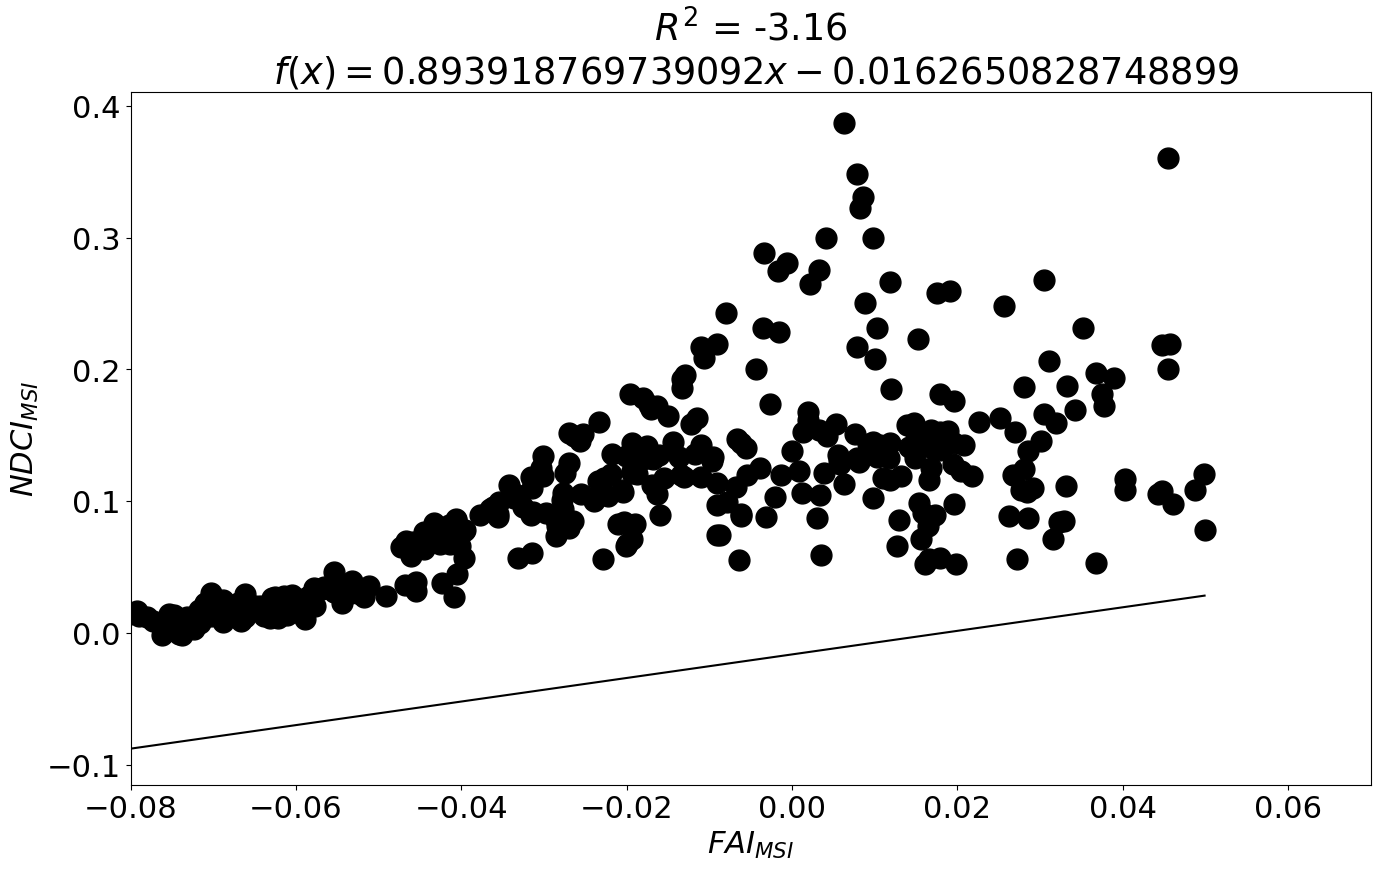

In [30]:
create_figure_linear(df_NDCI_FAI_merged['FAI_MSI'],df_NDCI_FAI_merged['NDCI_MSI'], popt, '$FAI_{MSI}$', '$NDCI_{MSI}$', 0.07)

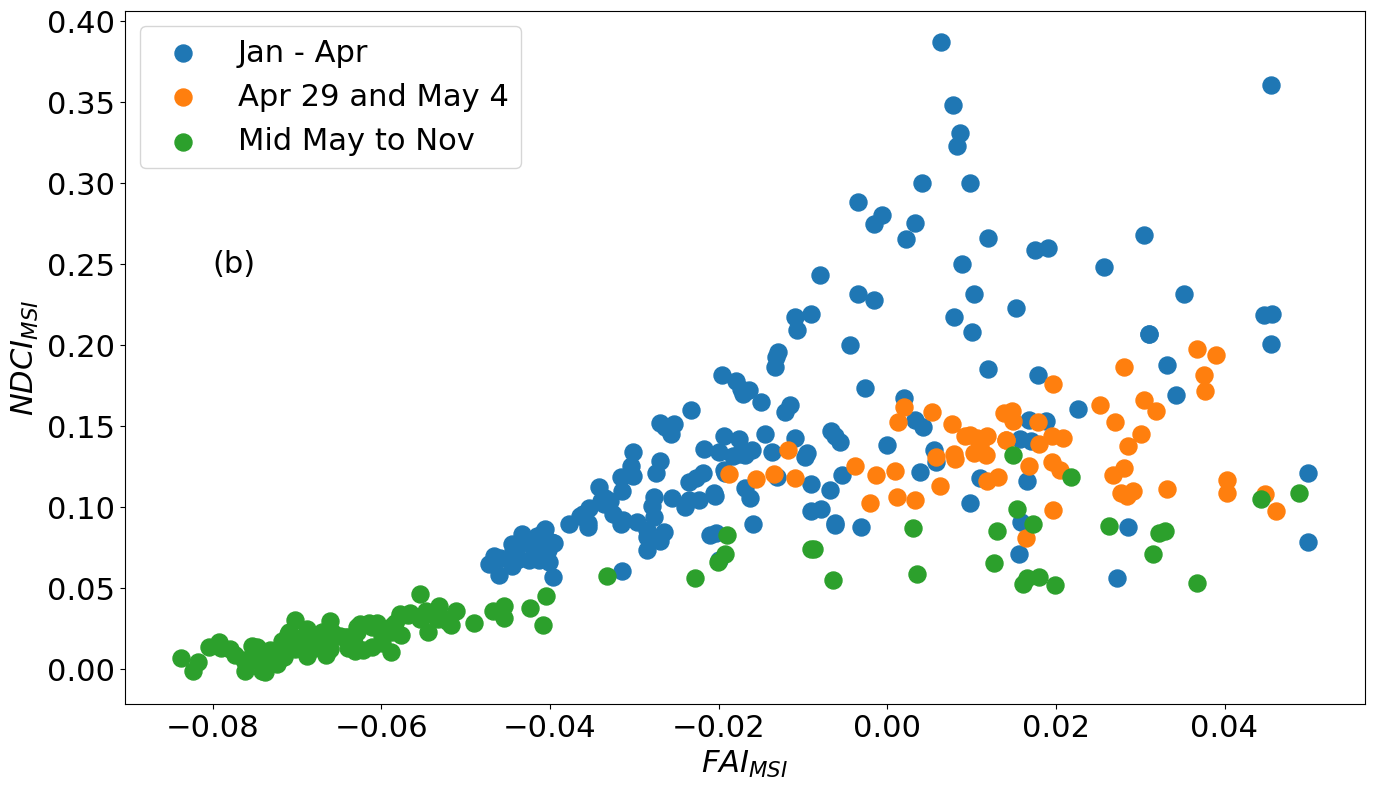

In [31]:
plt.rcParams.update({'font.size': 22})

N1 = 39+37+36+34+32
N2 = 32+32
N3 = 27+30+40+22+39
X1 = np.concatenate([[df_NDCI_FAI_merged['FAI_MSI'].loc[:N1], df_NDCI_FAI_merged['NDCI_MSI'].loc[:N1]]]).T 
X2 = np.concatenate([[df_NDCI_FAI_merged['FAI_MSI'].loc[N1:N1+N2], df_NDCI_FAI_merged['NDCI_MSI'].loc[N1:N1+N2]]]).T
X3 = np.concatenate([[df_NDCI_FAI_merged['FAI_MSI'].loc[N1+N2:N1+N2+N3], df_NDCI_FAI_merged['NDCI_MSI'].loc[N1+N2:N1+N2+N3]]]).T

X = np.concatenate([X1,X2,X3])

fig, ax = plt.subplots(figsize=(16,9))
    
ax.set_xlabel('$FAI_{MSI}$')
ax.set_ylabel('$NDCI_{MSI}$')
ax.scatter(X[:N1,0], X[:N1,1], s=150, label='Jan - Apr')
ax.scatter(X[N1:N1+N2,0], X[N1:N1+N2,1], s=150, label='Apr 29 and May 4')
ax.scatter(X[N1+N2:N1+N2+N3,0], X[N1+N2:N1+N2+N3,1], s= 150, label='Mid May to Nov')

ax.text(-0.08, 0.25, "(b)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')

ax.legend();

## Figure 3-a

In [32]:
south_polygon = ee.Geometry.Polygon([
    [38.987752380372896,8.396960809324506],
    [39.12473815918149,8.305246577149926],
    [38.99839538574399,8.28826010087597],
    [38.987752380372896,8.396960809324506],
])

north_polygon = ee.Geometry.Polygon([
    [39.12473815918149,8.305246577149926],
    [39.217741869323895,8.470160411708457],
    [39.07011308514421,8.520414671755388], 
    [38.987752380372896,8.396960809324506],
    [39.12473815918149,8.305246577149926],
])

south_part = south_polygon.intersection(**{'right': fc_largest.geometry(), 'maxError': 1})
north_part = north_polygon.intersection(**{'right': fc_largest.geometry(), 'maxError': 1})

# seed: 222
randomPoints_south = ee.FeatureCollection.randomPoints(south_part, 20, 222);
randomPoints_north = ee.FeatureCollection.randomPoints(north_part, 20, 222);  

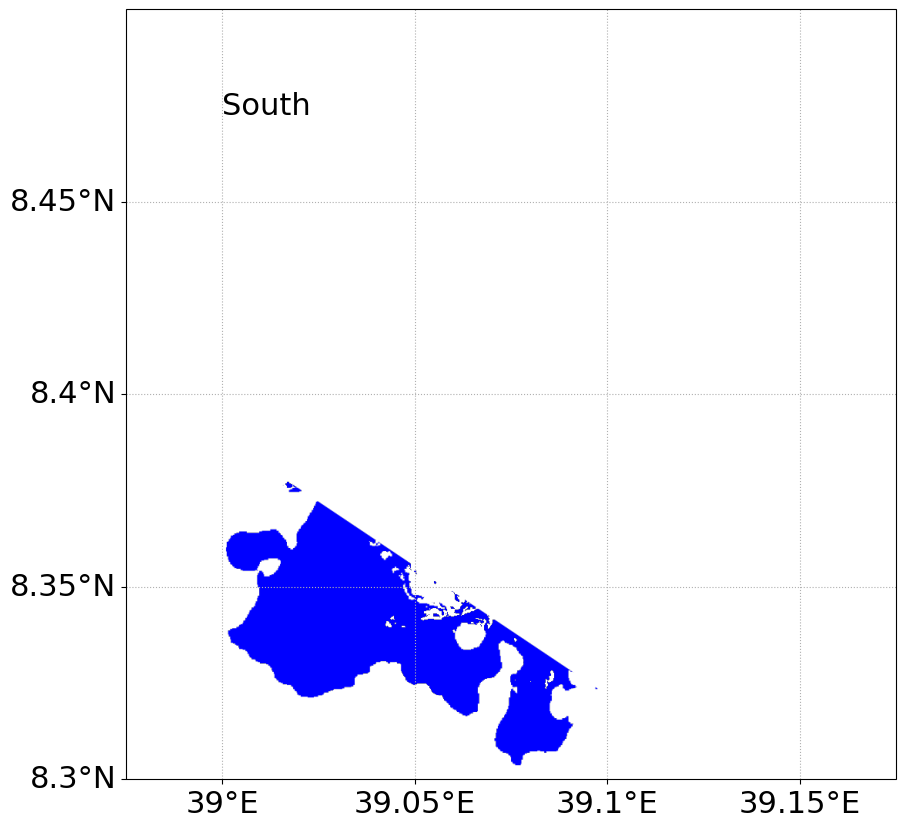

In [33]:
plt.rcParams.update({'font.size': 22})
# Drawing South part
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(withWater.select('water').clip(south_part), region=region, vis_params=waterVisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

ax.text(39, 8.475, "South", fontsize=22,
            verticalalignment='center', horizontalalignment='left');

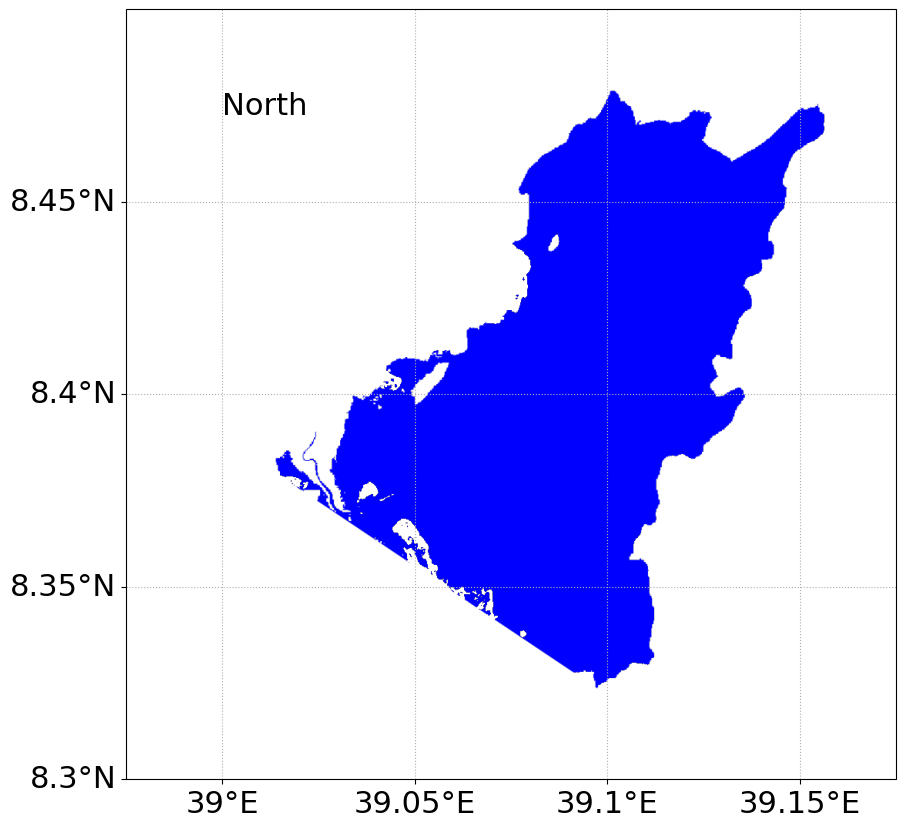

In [34]:
plt.rcParams.update({'font.size': 22})
# Drawing North part
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(withWater.select('water').clip(north_part), region=region, vis_params=waterVisParams)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

ax.text(39, 8.475, "North", fontsize=22,
            verticalalignment='center', horizontalalignment='left');

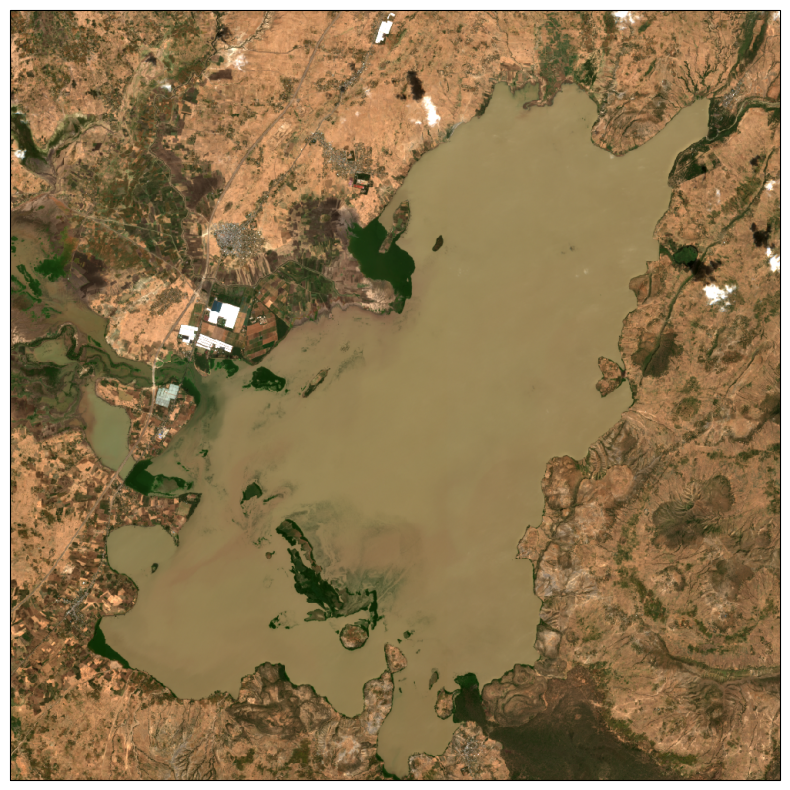

In [35]:
plt.rcParams.update({'font.size': 22})
# Drawing North part
fig = plt.figure(figsize=(15, 10))

VisParams = {
  'min': 0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
};

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate_list[i], endDate_list[i])\
        .map(cloudMasking_S2_otsu)\
        .median()\
        .divide(10000)

# use cartoee to get a map
ax = cartoee.get_map(Sen2ImageCollection, region=region, vis_params=VisParams)

In [36]:
startDate_list = ['2019-01-09', '2019-01-14', '2019-02-13',
            '2019-03-15',  '2019-04-14']

endDate_list = ['2019-01-10','2019-01-15', '2019-02-14',
           '2019-03-16',  '2019-04-15']

FAI_df_sentinel2_south = []
NDCI_df_sentinel2_south = []

FAI_df_sentinel2_north = []
NDCI_df_sentinel2_north = []

for i in range(len(startDate_list)):
    print('processing data no.', i)
    Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate_list[i], endDate_list[i])\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

    # NDCI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    NDCI = updatedMaskedImage.normalizedDifference(['B5', 'B4'])
    mask = withWater.select('water').gt(0);
    NDCIMask = NDCI.updateMask(mask).clip(fc_largest.geometry());
    
     # FAI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    FAI = updatedMaskedImage.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
        {'RED': updatedMaskedImage.select('B4'),'NIR': updatedMaskedImage.select('B8'), 
        'SWIR': updatedMaskedImage.select('B11')});

    mask = withWater.select('water').gt(0);
    FAIMask = FAI.updateMask(mask).clip(fc_largest.geometry());

    ndci_sampling_south = NDCIMask.sampleRegions(
            randomPoints_south, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    fai_sampling_south = FAIMask.sampleRegions(
            randomPoints_south, ['FAI'], 20.0, 'EPSG:4326', 1, True)
    
    ndci_sampling_north = NDCIMask.sampleRegions(
            randomPoints_north, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    fai_sampling_north = FAIMask.sampleRegions(
            randomPoints_north, ['FAI'], 20.0, 'EPSG:4326', 1, True)

    # South region                                                                                                
    ndci_list_south = ee.Dictionary(ndci_sampling_south.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    fai_list_south = ee.Dictionary(fai_sampling_south.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    # North region                                                                                                
    ndci_list_north = ee.Dictionary(ndci_sampling_north.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    fai_list_north = ee.Dictionary(fai_sampling_north.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    print('Date', startDate_list[i], '# of ndci data points: ', len(ndci_list_south), ', # of fai data points: ', len(fai_list_south))
    print('Date', startDate_list[i], '# of ndci data points: ', len(ndci_list_north), ', # of fai data points: ', len(fai_list_north))

    FAI_df_sentinel2_south.append(fai_list_south)
    NDCI_df_sentinel2_south.append(ndci_list_south)
    
    FAI_df_sentinel2_north.append(fai_list_north)
    NDCI_df_sentinel2_north.append(ndci_list_north)

processing data no. 0
Date 2019-01-09 # of ndci data points:  19 , # of fai data points:  19
Date 2019-01-09 # of ndci data points:  19 , # of fai data points:  19
processing data no. 1
Date 2019-01-14 # of ndci data points:  20 , # of fai data points:  20
Date 2019-01-14 # of ndci data points:  19 , # of fai data points:  19
processing data no. 2
Date 2019-02-13 # of ndci data points:  18 , # of fai data points:  18
Date 2019-02-13 # of ndci data points:  16 , # of fai data points:  16
processing data no. 3
Date 2019-03-15 # of ndci data points:  17 , # of fai data points:  17
Date 2019-03-15 # of ndci data points:  16 , # of fai data points:  16
processing data no. 4
Date 2019-04-14 # of ndci data points:  17 , # of fai data points:  17
Date 2019-04-14 # of ndci data points:  12 , # of fai data points:  12


In [37]:
# South
flat_list_FAI_south = [item for sublist in FAI_df_sentinel2_south for item in sublist]
flat_list_NDCI_south = [item for sublist in NDCI_df_sentinel2_south for item in sublist]
FAI_np_sentinel2_south = np.array(flat_list_FAI_south)
NDCI_np_sentinel2_south = np.array(flat_list_NDCI_south)

df_NDCI_FAI_merged_south = pd.DataFrame({'FAI_MSI':FAI_np_sentinel2_south ,'NDCI_MSI': NDCI_np_sentinel2_south})
df_NDCI_FAI_merged_south = df_NDCI_FAI_merged_south.drop(df_NDCI_FAI_merged_south[(df_NDCI_FAI_merged_south['FAI_MSI'] > 0.05)].index)

# North
flat_list_FAI_north = [item for sublist in FAI_df_sentinel2_north for item in sublist]
flat_list_NDCI_north = [item for sublist in NDCI_df_sentinel2_north for item in sublist]
FAI_np_sentinel2_north = np.array(flat_list_FAI_north)
NDCI_np_sentinel2_north = np.array(flat_list_NDCI_north)

df_NDCI_FAI_merged_north = pd.DataFrame({'FAI_MSI':FAI_np_sentinel2_north ,'NDCI_MSI': NDCI_np_sentinel2_north})
df_NDCI_FAI_merged_north = df_NDCI_FAI_merged_north.drop(df_NDCI_FAI_merged_north[(df_NDCI_FAI_merged_north['FAI_MSI'] > 0.05)].index)

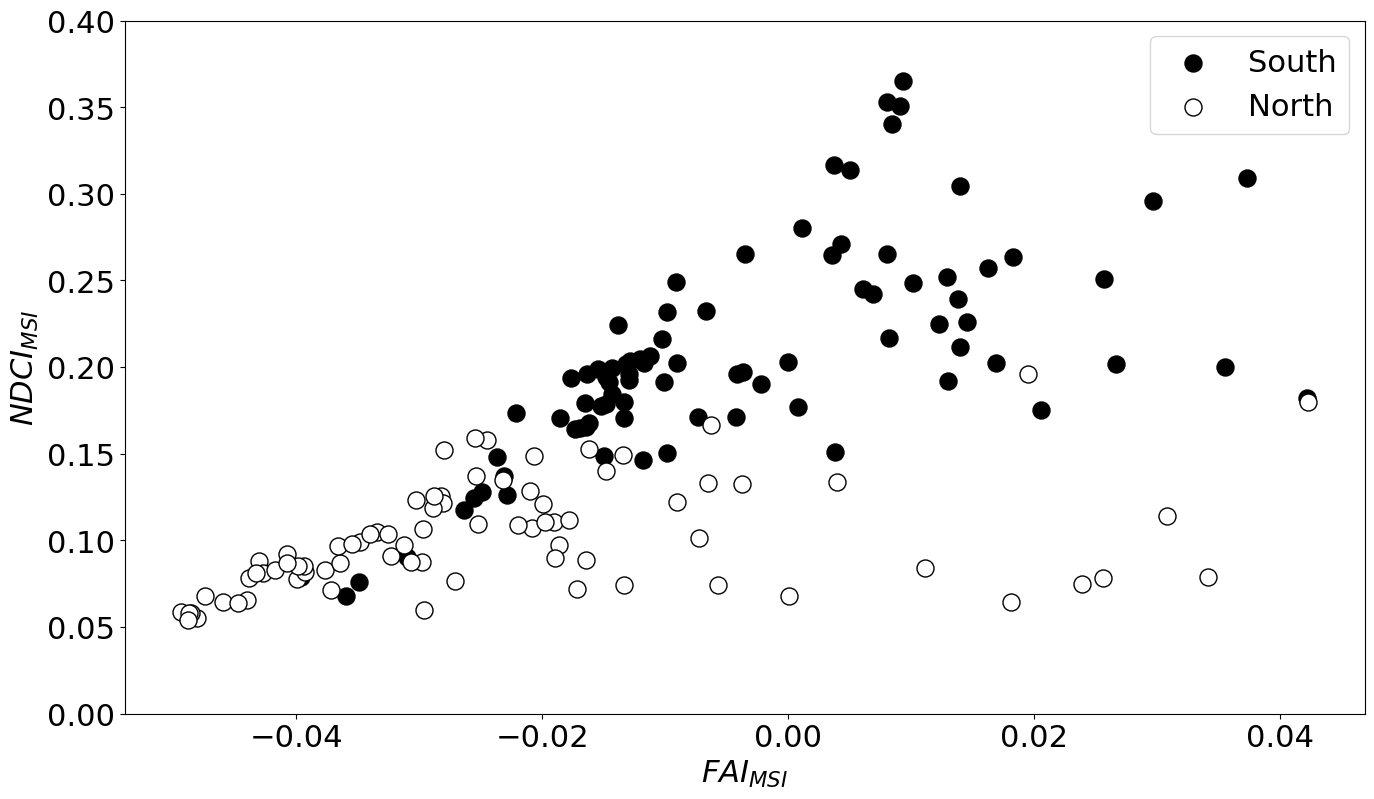

In [38]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(16,9))

X1 = np.concatenate([[df_NDCI_FAI_merged_south['FAI_MSI'][:], df_NDCI_FAI_merged_south['NDCI_MSI'][:]]]).T 
X2 = np.concatenate([[df_NDCI_FAI_merged_north['FAI_MSI'][:], df_NDCI_FAI_merged_north['NDCI_MSI'][:]]]).T

ax.set_xlabel('$FAI_{MSI}$')
ax.set_ylabel('$NDCI_{MSI}$')
ax.scatter(X1[:,0], X1[:,1], s=150, label='South', color='black')
ax.scatter(X2[:,0], X2[:,1], s=150, label='North', color='white', edgecolors='black')
ax.set_ylim(0,0.4)
plt.legend();

## Figure 4

2.33926594152091 x + 0.215464311144022


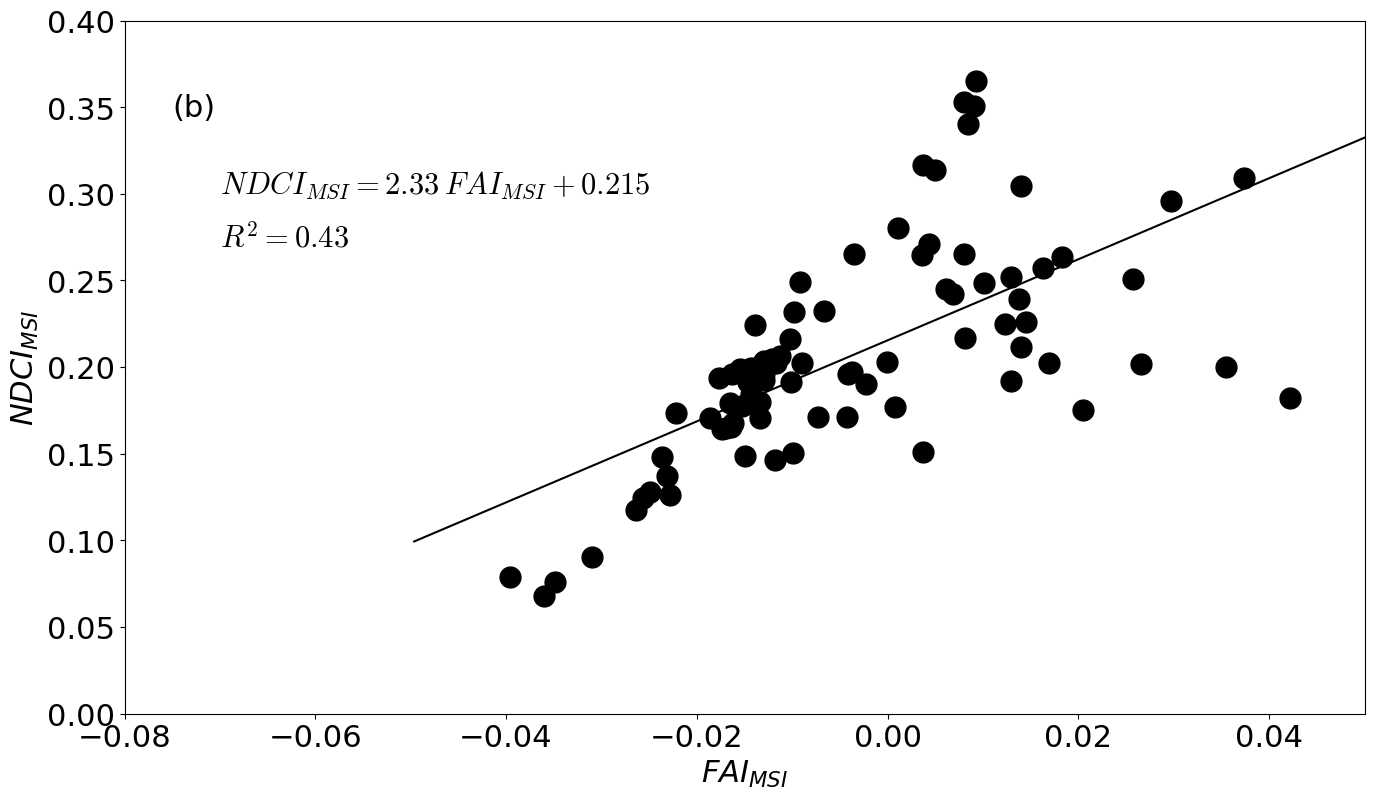

In [39]:
satellite_data = X1[:,0]
insitu_data = X1[:,1]

popt, pcov = curve_fit(func_linear, satellite_data, insitu_data)

vec_algorithm = np.vectorize(lambda data: linear_algorithm(data, popt))
Yhat = vec_algorithm(satellite_data)
Y = insitu_data

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1-d1.dot(d1)/d2.dot(d2)

# fig, ax = plt.subplots(figsize=(16,9), dpi=600)
fig, ax = plt.subplots(figsize=(16,9))
t = np.linspace(np.min(satellite_data)-0.01,np.max(satellite_data)+0.01,100)

xs = sym.Symbol('x')
tex = sym.latex(func_linear(xs, *popt)).replace('$', '')

ax.set_xlabel('$FAI_{MSI}$')
ax.set_ylabel('$NDCI_{MSI}$')
print(tex)
# ax.set_title(f'$R^2$ = {round(r2, 2)}')
ax.set_xlim(-0.08,0.05)
ax.set_ylim(0,0.4)
ax.plot(satellite_data,  insitu_data, 'ko', ms=15)
ax.plot(t, func_linear(t, *popt), 'k-')

ax.text(-0.075, 0.35, "(b)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')

# A text mixing normal text and math text.
msg = (r"$NDCI_{MSI} = 2.33\:FAI_{MSI} + 0.215$")
msg2 = r"$R^2 = 0.43$"

# Set the text in the plot.
ax.text(-0.07, 0.3, msg, size=22, math_fontfamily='cm')
ax.text(-0.07, 0.27, msg2, size=22, math_fontfamily='cm');

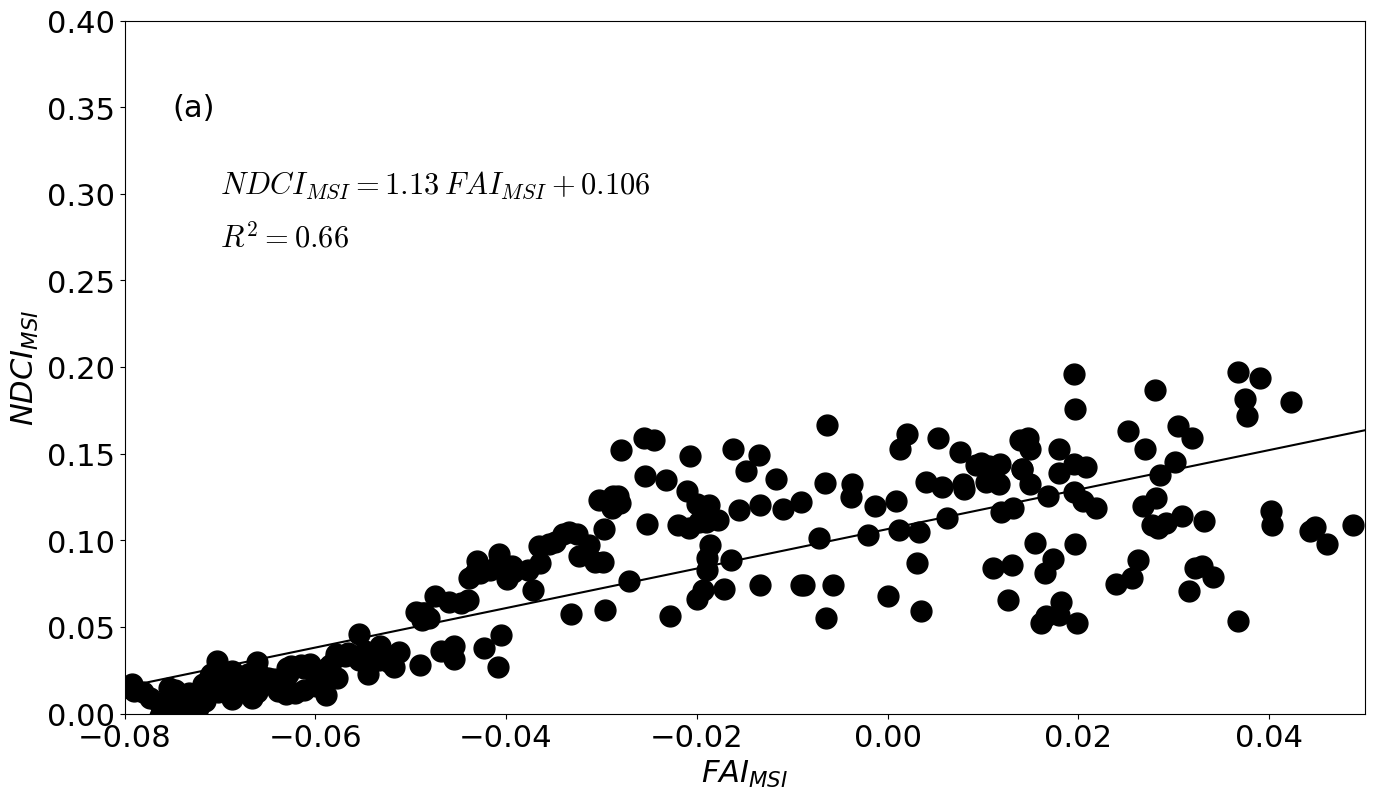

In [40]:
# North + May to Nov
X_merged = np.concatenate([X[N1:N1+N2+N3,:],X2])

satellite_data = X_merged[:,0]
insitu_data = X_merged[:,1]

popt, pcov = curve_fit(func_linear, satellite_data, insitu_data)

vec_algorithm = np.vectorize(lambda data: linear_algorithm(data, popt))
Yhat = vec_algorithm(satellite_data)
Y = insitu_data

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1-d1.dot(d1)/d2.dot(d2)

# fig, ax = plt.subplots(figsize=(16,9), dpi=600)
fig, ax = plt.subplots(figsize=(16,9))
t = np.linspace(np.min(satellite_data),np.max(satellite_data)+0.01,100)

xs = sym.Symbol('x')
tex = sym.latex(func_linear(xs, *popt)).replace('$', '')

ax.set_xlabel('$FAI_{MSI}$')
ax.set_ylabel('$NDCI_{MSI}$')
ax.set_xlim(-0.08,0.05)
ax.set_ylim(0,0.4)
ax.plot(satellite_data,  insitu_data, 'ko', ms=15)
ax.plot(t, func_linear(t, *popt), 'k-')

ax.text(-0.075, 0.35, "(a)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')

# A text mixing normal text and math text.
msg = (r"$NDCI_{MSI} = 1.13\:FAI_{MSI} + 0.106$")
msg2 = r"$R^2 = 0.66$"

# Set the text in the plot.
ax.text(-0.07, 0.3, msg, size=22, math_fontfamily='cm')
ax.text(-0.07, 0.27, msg2, size=22, math_fontfamily='cm');

## Figure 5-a

In [41]:
startDate_list = ['2020-04-08', '2020-06-27', '2020-09-15', '2020-12-04']
endDate_list = ['2020-04-09', '2020-06-28','2020-09-16', '2020-12-05']

NDCI_df_sentinel2_val = []
NDCI_df_landasat8_val = []

for i in range(len(startDate_list)):
    print('iteration: ', i)
    Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate_list[i], endDate_list[i])\
        .map(cloudMasking_S2_otsu)
    
    # NDCI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    NDCI = updatedMaskedImage.normalizedDifference(['B5', 'B4'])
    
    # NDCI - OLI
    L8ImageCollection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(geom)\
    .filterDate(startDate_list[i], endDate_list[i])\
    .map(maskL8sr)

    withWater_l8 = addWater_l8(L8ImageCollection, startDate_list[i], endDate_list[i], bounds)
    updatedMaskedImage_l8 = withWater_l8.select(L8_BANDS)

    NDCI_l8 = updatedMaskedImage_l8.expression('1.0*NIR-(RED+(SWIR-RED)*((865.0-654.5) / (1608.5-654.5)))',
        {'RED': updatedMaskedImage_l8.select('SR_B4'),'NIR': updatedMaskedImage_l8.select('SR_B5'), 
        'SWIR': updatedMaskedImage_l8.select('SR_B6')})


    mask_l8 = withWater_l8.select('water').gt(0);

    NDCIMask_l8 = NDCI_l8.updateMask(mask_l8).clip(fc_largest.geometry());
    NDCIMask = NDCI.updateMask(mask_l8).clip(fc_largest.geometry());    

    ndci_sampling_val = NDCIMask.sampleRegions(
            randomPoints2, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    ndci_sampling_l8_val = NDCIMask_l8.sampleRegions(
            randomPoints2, ['NDCI-L8'], 30.0, 'EPSG:4326', 1, True)

    # get values of 20 pixels                                                                                                 
    ndci_list_s2 = ee.Dictionary(ndci_sampling_val.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    ndci_list_l8 = ee.Dictionary(ndci_sampling_l8_val.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    print('Date', startDate_list[i], '# of MSI data points: ', len(ndci_list_s2), ', # of OLI data points: ', len(ndci_list_l8)) 
    
    NDCI_df_sentinel2_val.append(ndci_list_s2)
    NDCI_df_landasat8_val.append(ndci_list_l8)

iteration:  0
Date 2020-04-08 # of MSI data points:  35 , # of OLI data points:  35
iteration:  1
Date 2020-06-27 # of MSI data points:  25 , # of OLI data points:  25
iteration:  2
Date 2020-09-15 # of MSI data points:  18 , # of OLI data points:  18
iteration:  3
Date 2020-12-04 # of MSI data points:  38 , # of OLI data points:  38


In [42]:
flat_list_NDCI_s2_val = [item for sublist in NDCI_df_sentinel2_val for item in sublist]
flat_list_NDCI_l8_val = [item for sublist in NDCI_df_landasat8_val for item in sublist]
NDCI_np_sentinel2_val = np.array(flat_list_NDCI_s2_val)
NDCI_np_landasat8_val = np.array(flat_list_NDCI_l8_val)

In [43]:
df_NDCI_s2_l8_merged = pd.DataFrame({'NDCI_MSI':NDCI_np_sentinel2_val ,'NDCI_OLI': NDCI_np_landasat8_val})
df_NDCI_s2_l8_merged = df_NDCI_s2_l8_merged.drop(df_NDCI_s2_l8_merged[(df_NDCI_s2_l8_merged['NDCI_OLI'] > 0.05)].index)

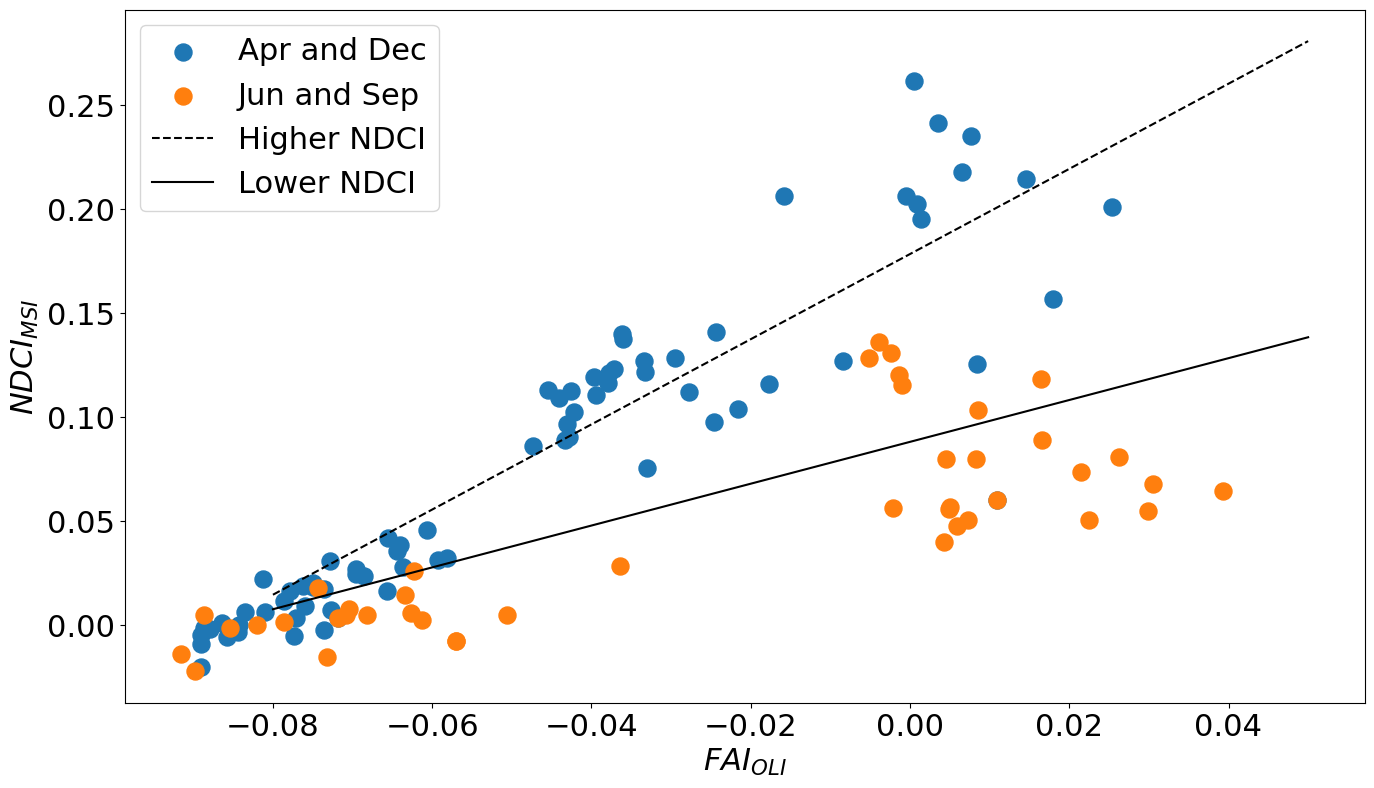

In [44]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(16,9))

N1 = 35
N2 = 25
N3 = 18
N4 = 38

X1 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[:N1], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[:N1]]]).T 
X2 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1:N1+N2], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1:N1+N2]]]).T
X3 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1+N2:N1+N2+N3], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1+N2:N1+N2+N3]]]).T
X4 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1+N2+N3:N1+N2+N3+N4], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1+N2+N3:N1+N2+N3+N4]]]).T


X_dry = np.concatenate([X1,X4])
X_wet = np.concatenate([X2,X3])


ax.set_xlabel('$FAI_{OLI}$')
ax.set_ylabel('$NDCI_{MSI}$')
ax.scatter(X_dry[:,0], X_dry[:,1], s=150, label='Apr and Dec')
ax.scatter(X_wet[:,0], X_wet[:,1], s=150, label='Jun and Sep')

x_vals = np.linspace(-0.08,0.05,100)
y_vals = 0.215+2.3*(0.89*x_vals-0.016)
y_vals2 = 0.106+1.13*(0.89*x_vals-0.016)

ax.plot(x_vals, y_vals, 'k--', label='Higher NDCI')
ax.plot(x_vals, y_vals2, 'k-', label='Lower NDCI')


ax.legend();

In [45]:
# seed: 223
randomPoints_south = ee.FeatureCollection.randomPoints(south_part, 20, 223);
randomPoints_north = ee.FeatureCollection.randomPoints(north_part, 20, 223);  

In [46]:
startDate_list = ['2020-04-08', '2020-12-04']
endDate_list = ['2020-04-09', '2020-12-05']

FAI_df_sentinel2_south = []
NDCI_df_sentinel2_south = []

FAI_df_sentinel2_north = []
NDCI_df_sentinel2_north = []

for i in range(len(startDate_list)):
    print('processing data no.', i)
    Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
        .filterBounds(geom)\
        .filterDate(startDate_list[i], endDate_list[i])\
        .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
        .map(cloudMasking_S2_otsu)

    # NDCI - MSI
    withWater = addWater_S2(Sen2ImageCollection, startDate_list[i], endDate_list[i], bounds)
    withWater = withWater.divide(10000)
    updatedMaskedImage = withWater.select(S2_BANDS_2)

    NDCI = updatedMaskedImage.normalizedDifference(['B5', 'B4'])
    mask = withWater.select('water').gt(0);
    NDCIMask = NDCI.updateMask(mask).clip(fc_largest.geometry());
    
    L8ImageCollection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')\
    .filterBounds(geom)\
    .filterDate(startDate_list[i], endDate_list[i])\
    .map(maskL8sr)

    withWater_l8 = addWater_l8(L8ImageCollection, startDate_list[i], endDate_list[i], bounds)
    updatedMaskedImage_l8 = withWater_l8.select(L8_BANDS)

    FAI = updatedMaskedImage_l8.expression('1.0*NIR-(RED+(SWIR-RED)*((865.0-654.5) / (1608.5-654.5)))',
        {'RED': updatedMaskedImage_l8.select('SR_B4'),'NIR': updatedMaskedImage_l8.select('SR_B5'), 
        'SWIR': updatedMaskedImage_l8.select('SR_B6')})


    mask_l8 = withWater_l8.select('water').gt(0);

    FAIMask = FAI.updateMask(mask_l8).clip(fc_largest.geometry());
    NDCIMask = NDCI.updateMask(mask_l8).clip(fc_largest.geometry());  

    ndci_sampling_south = NDCIMask.sampleRegions(
            randomPoints_south, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    fai_sampling_south = FAIMask.sampleRegions(
            randomPoints_south, ['FAI'], 30.0, 'EPSG:4326', 1, True)
    
    ndci_sampling_north = NDCIMask.sampleRegions(
            randomPoints_north, ['NDCI'], 20.0, 'EPSG:4326', 1, True)

    fai_sampling_north = FAIMask.sampleRegions(
            randomPoints_north, ['FAI'], 30.0, 'EPSG:4326', 1, True)

    # South region                                                                                                
    ndci_list_south = ee.Dictionary(ndci_sampling_south.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    fai_list_south = ee.Dictionary(fai_sampling_south.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    # North region                                                                                                
    ndci_list_north = ee.Dictionary(ndci_sampling_north.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['nd']
    })).get('list').getInfo()

    fai_list_north = ee.Dictionary(fai_sampling_north.reduceColumns(**{
      'reducer': ee.Reducer.toList(), 
      'selectors': ['constant']
    })).get('list').getInfo()
    
    print('Date', startDate_list[i], '# of ndci data points for south: ', len(ndci_list_south), ', # of fai data points: ', len(fai_list_south))
    print('Date', startDate_list[i], '# of ndci data points for north: ', len(ndci_list_north), ', # of fai data points: ', len(fai_list_north))

    FAI_df_sentinel2_south.append(fai_list_south)
    NDCI_df_sentinel2_south.append(ndci_list_south)
    
    FAI_df_sentinel2_north.append(fai_list_north)
    NDCI_df_sentinel2_north.append(ndci_list_north)

processing data no. 0
Date 2020-04-08 # of ndci data points for south:  14 , # of fai data points:  14
Date 2020-04-08 # of ndci data points for north:  19 , # of fai data points:  19
processing data no. 1
Date 2020-12-04 # of ndci data points for south:  16 , # of fai data points:  16
Date 2020-12-04 # of ndci data points for north:  19 , # of fai data points:  19


In [47]:
# South
flat_list_FAI_south = [item for sublist in FAI_df_sentinel2_south for item in sublist]
flat_list_NDCI_south = [item for sublist in NDCI_df_sentinel2_south for item in sublist]
FAI_np_sentinel2_south = np.array(flat_list_FAI_south)
NDCI_np_sentinel2_south = np.array(flat_list_NDCI_south)

In [48]:
df_NDCI_FAI_merged_south = pd.DataFrame({'FAI_MSI':FAI_np_sentinel2_south ,'NDCI_MSI': NDCI_np_sentinel2_south})
df_NDCI_FAI_merged_south = df_NDCI_FAI_merged_south.drop(df_NDCI_FAI_merged_south[(df_NDCI_FAI_merged_south['FAI_MSI'] > 0.05)].index)

# North
flat_list_FAI_north = [item for sublist in FAI_df_sentinel2_north for item in sublist]
flat_list_NDCI_north = [item for sublist in NDCI_df_sentinel2_north for item in sublist]
FAI_np_sentinel2_north = np.array(flat_list_FAI_north)
NDCI_np_sentinel2_north = np.array(flat_list_NDCI_north)

df_NDCI_FAI_merged_north = pd.DataFrame({'FAI_MSI':FAI_np_sentinel2_north ,'NDCI_MSI': NDCI_np_sentinel2_north})
df_NDCI_FAI_merged_north = df_NDCI_FAI_merged_north.drop(df_NDCI_FAI_merged_north[(df_NDCI_FAI_merged_north['FAI_MSI'] > 0.05)].index)

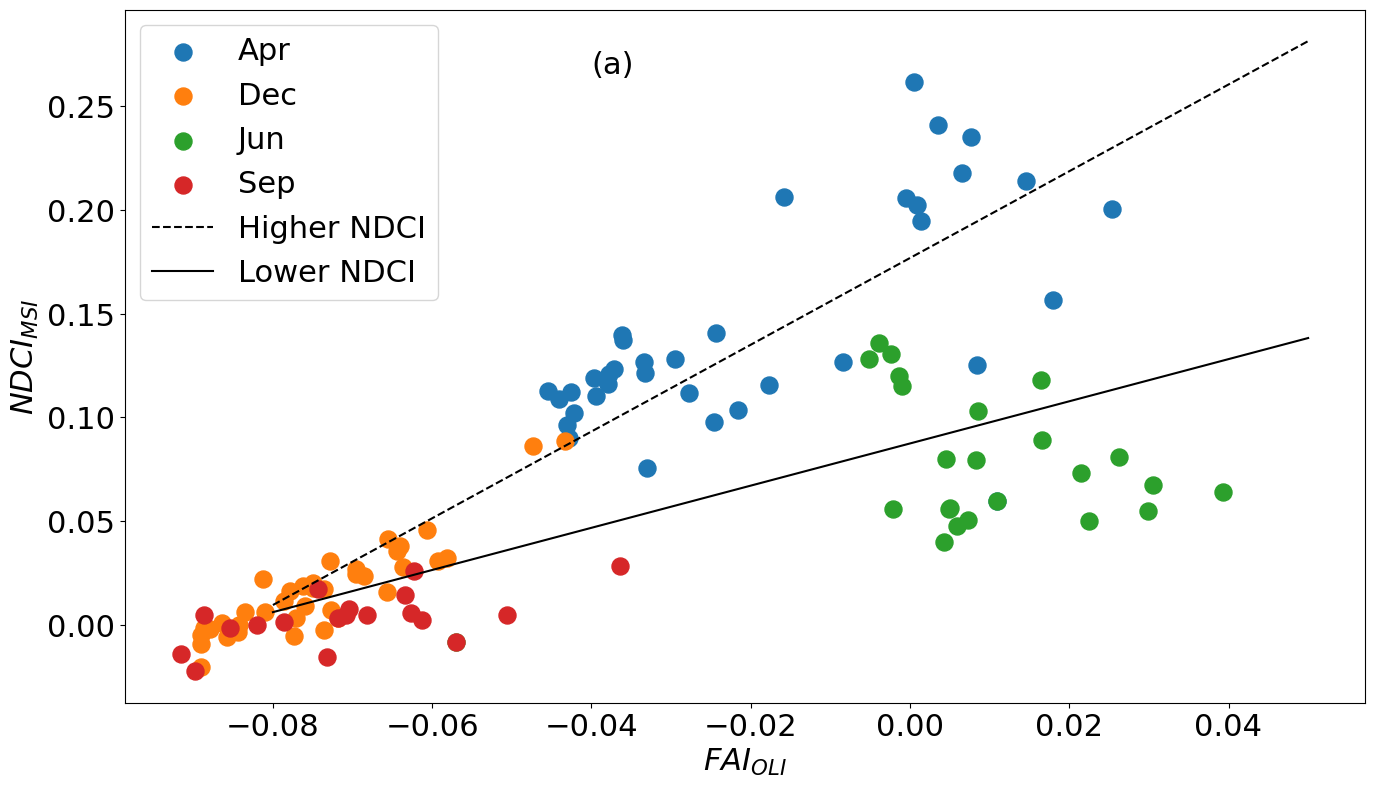

In [49]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(16,9))

N1 = 35
N1S = 14
N1N = 19
N2 = 25
N3 = 18
N4 = 38

X1 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[:N1], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[:N1]]]).T 
X1_north = np.concatenate([[df_NDCI_FAI_merged_north['FAI_MSI'].loc[:N1N], df_NDCI_FAI_merged_north['NDCI_MSI'].loc[:N1N]]]).T 
X1_south = np.concatenate([[df_NDCI_FAI_merged_south['FAI_MSI'].loc[:N1S], df_NDCI_FAI_merged_south['NDCI_MSI'].loc[:N1S]]]).T 

X2 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1:N1+N2], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1:N1+N2]]]).T
X3 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1+N2:N1+N2+N3], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1+N2:N1+N2+N3]]]).T

X4 = np.concatenate([[df_NDCI_s2_l8_merged['NDCI_OLI'].loc[N1+N2+N3:N1+N2+N3+N4], df_NDCI_s2_l8_merged['NDCI_MSI'].loc[N1+N2+N3:N1+N2+N3+N4]]]).T
X4_north = np.concatenate([[df_NDCI_FAI_merged_north['FAI_MSI'].loc[N1N:], df_NDCI_FAI_merged_north['NDCI_MSI'].loc[N1N:]]]).T 
X4_south = np.concatenate([[df_NDCI_FAI_merged_south['FAI_MSI'].loc[N1S:], df_NDCI_FAI_merged_south['NDCI_MSI'].loc[N1S:]]]).T 



X_dry_north = np.concatenate([X1_north,X4_north])
X_dry_south = np.concatenate([X1_south,X4_south])
X_wet = np.concatenate([X2,X3])


ax.set_xlabel('$FAI_{OLI}$')
ax.set_ylabel('$NDCI_{MSI}$')
# ax.scatter(X_dry_north[:,0], X_dry_north[:,1], s=150, label='Apr and Dec (North)')
# ax.scatter(X_dry_south[:,0], X_dry_south[:,1], s=150, label='Apr and Dec (South)')
ax.scatter(X1[:,0], X1[:,1], s=150, label='Apr')
ax.scatter(X4[:,0], X4[:,1], s=150, label='Dec')
ax.scatter(X2[:,0], X2[:,1], s=150, label='Jun')
ax.scatter(X3[:,0], X3[:,1], s=150, label='Sep')

# ax.scatter(X_wet[:,0], X_wet[:,1], s=150, label='Jun and Sep')

x_vals = np.linspace(-0.08,0.05,100)
# y_vals = 0.215+2.3*x_vals
# y_vals2 = 0.106+1.13*x_vals

y_vals = 0.215+2.339*(0.894*x_vals-0.0163)
y_vals2 = 0.106+1.137*(0.894*x_vals-0.0163)

ax.plot(x_vals, y_vals, 'k--', label='Higher NDCI')
ax.plot(x_vals, y_vals2, 'k-', label='Lower NDCI')

ax.text(-0.04, 0.27, "(a)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')


ax.legend();

In [50]:
# MAPE for Apr
y_hat = 0.215+2.339*(0.894*X1[:,0]-0.0163)
mape(X1[:,1], y_hat, len(y_hat) )

25.985877738336683

In [51]:
# MAPE for June
y_hat2 = 0.106+1.137*(0.894*X2[:,0]-0.0163)
mape(X2[:,1], y_hat2, len(y_hat2))

34.42548814687265

## Figure 5-b

In [52]:
startDate1 = '2013-08-11'
endDate1 = '2013-08-12'

startDate2 = '2013-12-01'
endDate2 = '2013-12-18'

startDate3 = '2014-02-03'
endDate3 = '2014-02-04'

startDate4 = '2014-03-07'
endDate4 = '2014-03-24'

startDate5 = '2014-04-08'
endDate5 = '2014-04-29'

startDate6 = '2015-03-10'
endDate6 = '2015-03-11'

startDate7 = '2015-04-11'
endDate7 = '2015-04-12'

startDate8 = '2015-05-29'
endDate8 = '2015-05-30'

startDate9 = '2015-06-14'
endDate9 = '2015-06-15'

startDate10 = '2015-08-01'
endDate10 = '2015-08-18'

startDate11 = '2015-10-04'
endDate11 = '2015-10-21'

startDate12 = '2015-11-21'
endDate12 = '2015-11-22'

startDate13 = '2015-12-07'
endDate13 = '2015-12-23'

startDate14 = '2016-01-08'
endDate14 = '2016-01-25'

startDate15 = '2016-02-09'
endDate15 = '2016-02-26'

startDate16 = '2016-03-12'
endDate16 = '2016-03-29'

startDate17 = '2016-04-29'
endDate17 = '2016-04-30'

startDate1 = '2017-05-02'
endDate1 = '2017-05-03'

startDate2 = '2017-06-13'
endDate2 = '2017-06-20'

startDate3 = '2017-07-21'
endDate3 = '2017-07-22'

startDate4 = '2017-08-06'
endDate4 = '2017-08-07'

sampling1 = ee.Geometry.Point([39.083333, 8.35])
sampling2 = ee.Geometry.Point([39.09366744,8.445687])
sampling3 = ee.Geometry.Point([39.03633255005063,8.359420016394715])

sampling4 = ee.Geometry.Point([39.00371688842954,8.357381960240502])
sampling5 = ee.Geometry.Point([39.026719512941256,8.348550260536442])
sampling6 = ee.Geometry.Point([39.15065902710141,8.469050624662039])

In [53]:
L8_BANDS = ['SR_B6', 'SR_B5', 'SR_B3', 'SR_B4', 'SR_B2', 'SR_B1', 'water']

def addNDCI(image):
    NDCI = image.expression('1.0*NIR-(RED+(SWIR-RED)*((834.05-664.75) / (1612.05-664.75)))',
    {'RED': image.select('SR_B4'),'NIR': image.select('SR_B5'), 
    'SWIR': image.select('SR_B6')}).rename('NDCI');

    return image.addBands(NDCI)

In [54]:
chla_df_1_aug13 = retrieve_NDCI_l8(sampling1, startDate1, endDate1, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_1_dec13 = retrieve_NDCI_l8(sampling1, startDate2, endDate2, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_1_feb14 = retrieve_NDCI_l8(sampling1, startDate3, endDate3, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_1_mar14 = retrieve_NDCI_l8(sampling1, startDate4, endDate4, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_1_apr14 = retrieve_NDCI_l8(sampling1, startDate5, endDate5, L8_BANDS, fc_largest, bounds, addNDCI)

chla_df_2_mar15 = retrieve_NDCI_l8(sampling2, startDate6, endDate6, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_apr15 = retrieve_NDCI_l8(sampling2, startDate7, endDate7, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_may15 = retrieve_NDCI_l8(sampling2, startDate8, endDate8, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_oct15 = retrieve_NDCI_l8(sampling2, startDate11, endDate11, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_nov15 = retrieve_NDCI_l8(sampling2, startDate12, endDate12, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_jan16 = retrieve_NDCI_l8(sampling2, startDate14, endDate14, L8_BANDS, fc_largest, bounds, addNDCI)

chla_df_3_may15 = retrieve_NDCI_l8(sampling3, startDate8, endDate8, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_jun15 = retrieve_NDCI_l8(sampling3, startDate9, endDate9, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_oct15 = retrieve_NDCI_l8(sampling3, startDate11, endDate11, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_nov15 = retrieve_NDCI_l8(sampling3, startDate12, endDate12, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_dec15 = retrieve_NDCI_l8(sampling3, startDate13, endDate13, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_jan16 = retrieve_NDCI_l8(sampling3, startDate14, endDate14, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_feb16 = retrieve_NDCI_l8(sampling3, startDate15, endDate15, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_mar16 = retrieve_NDCI_l8(sampling3, startDate16, endDate16, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_apr16 = retrieve_NDCI_l8(sampling3, startDate17, endDate17, L8_BANDS, fc_largest, bounds, addNDCI)

chla_df_1_june = retrieve_NDCI_l8(sampling4, startDate2, endDate2, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_1_july = retrieve_NDCI_l8(sampling4, startDate3, endDate3, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_june = retrieve_NDCI_l8(sampling5, startDate2, endDate2, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_july = retrieve_NDCI_l8(sampling5, startDate3, endDate3, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_2_aug = retrieve_NDCI_l8(sampling5, startDate4, endDate4, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_may = retrieve_NDCI_l8(sampling6, startDate1, endDate1, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_june = retrieve_NDCI_l8(sampling6, startDate2, endDate2, L8_BANDS, fc_largest, bounds, addNDCI)
chla_df_3_july = retrieve_NDCI_l8(sampling6, startDate3, endDate3, L8_BANDS, fc_largest, bounds, addNDCI)

In [55]:
S_NDCI = np.concatenate((\
                         chla_df_1_aug13,
                         chla_df_1_dec13,
                         chla_df_1_feb14,
                         chla_df_1_mar14,
                         chla_df_1_apr14,
                         chla_df_2_mar15,
                         chla_df_2_apr15,
                         chla_df_2_may15,
                         chla_df_2_oct15,
                         chla_df_2_nov15,
                         chla_df_2_jan16,
                         chla_df_3_may15,
                         chla_df_3_jun15,
                         chla_df_3_oct15,
                         chla_df_3_nov15,
                         chla_df_3_dec15,
                         chla_df_3_jan16,
                         chla_df_3_feb16,
                         chla_df_3_mar16,
                         chla_df_3_apr16,
                         chla_df_1_june,
                         chla_df_1_july,
                         chla_df_2_june,
                         chla_df_2_july,
                         chla_df_2_aug,
                         chla_df_3_may,
                         chla_df_3_june,
                         chla_df_3_july,
                        ), axis=0) 

In [56]:
chla_insitu = np.array([
    13.41, 108.7, 51.53, 88.94,75.53,
    24.03, 34.51,14.38,
    7.979, 7.979, 27.927, 32.01,32.01,
    5.064 ,1.553,
    0.5755,1.179,3.856,2.561,2.561,0.5179,0.5179,4.92,4.92,
    1.899,
    25.02, 7.64, 
    29.295, 5.493, 6.056, 24.93, 20, 16.478, 
])

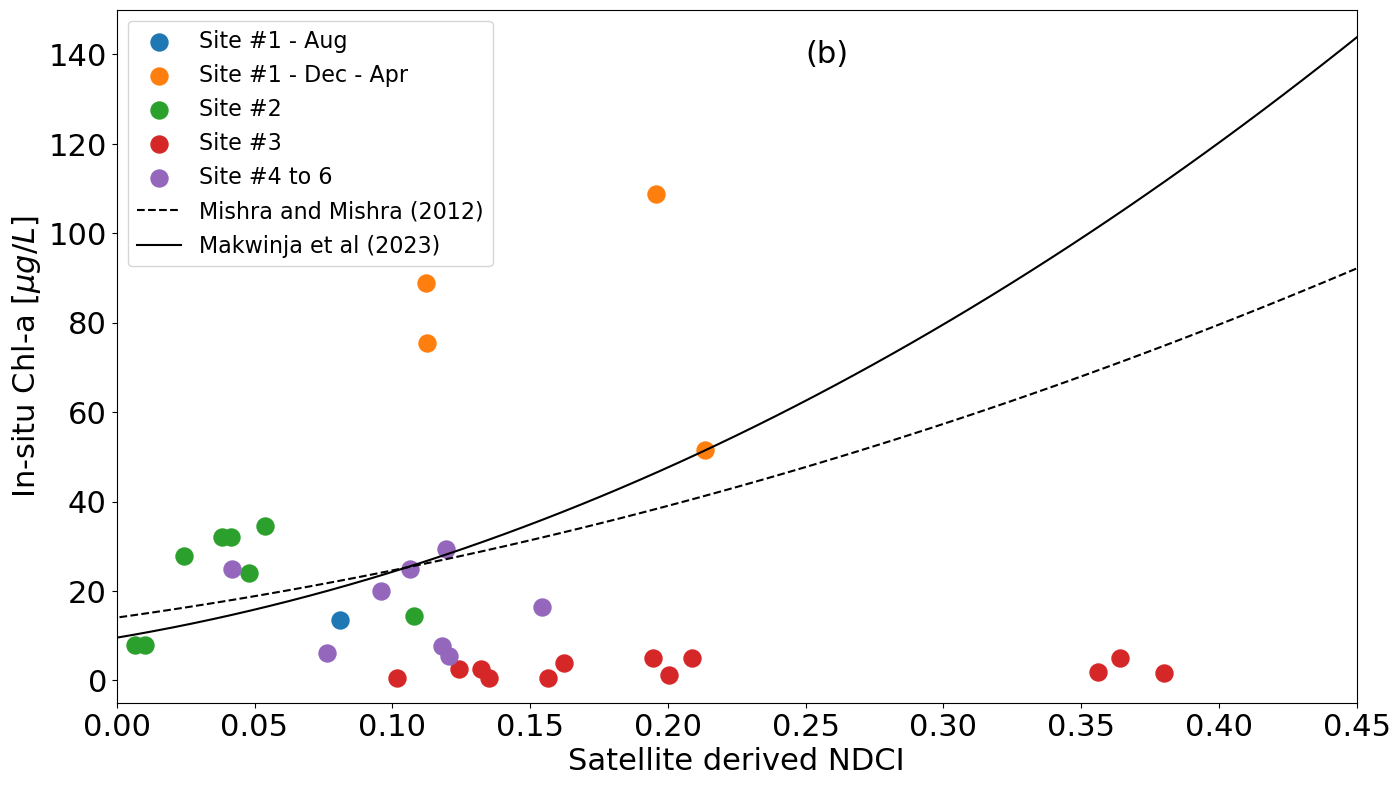

In [57]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(16,9))

ax.set_xlabel('Satellite derived NDCI')
ax.set_ylabel('In-situ Chl-a [$\mu g/L$]')

ax.scatter(1.13*(0.89*S_NDCI[:1]-0.016)+0.106, chla_insitu[:1], s=150, label='Site #1 - Aug')
ax.scatter(2.3*(0.89*S_NDCI[1:5]-0.016)+0.215, chla_insitu[1:5], s=150, label='Site #1 - Dec - Apr')

ax.scatter(1.13*(0.89*S_NDCI[5:13]-0.016)+0.106, chla_insitu[5:13], s=150, label='Site #2')

ax.scatter(1.13*(0.89*S_NDCI[13:25]-0.016)+0.106, chla_insitu[13:25], s=150, label='Site #3')

ax.scatter(1.13*(0.89*S_NDCI[25:]-0.016)+0.106, chla_insitu[25:], s=150, label='Site #4 to 6')


x_vals = np.linspace(-0.1,0.6,100)
y_vals = 14.039+86.115*x_vals+194.325*x_vals**2
y_vals_2 = 9.547+104*x_vals+431.98*x_vals**2

ax.plot(x_vals, y_vals, 'k--', label='Mishra and Mishra (2012)')
ax.plot(x_vals, y_vals_2, 'k-', label='Makwinja et al (2023)')

ax.set_xlim([0,0.45])
ax.set_ylim([-5,150])
ax.text(0.25, 140, "(b)", fontsize=22,
            verticalalignment='center', horizontalalignment='left')

# ax.legend(bbox_to_anchor=(1, 1))
ax.legend(fontsize=16);

## Figure 6

<Figure size 1000x800 with 0 Axes>

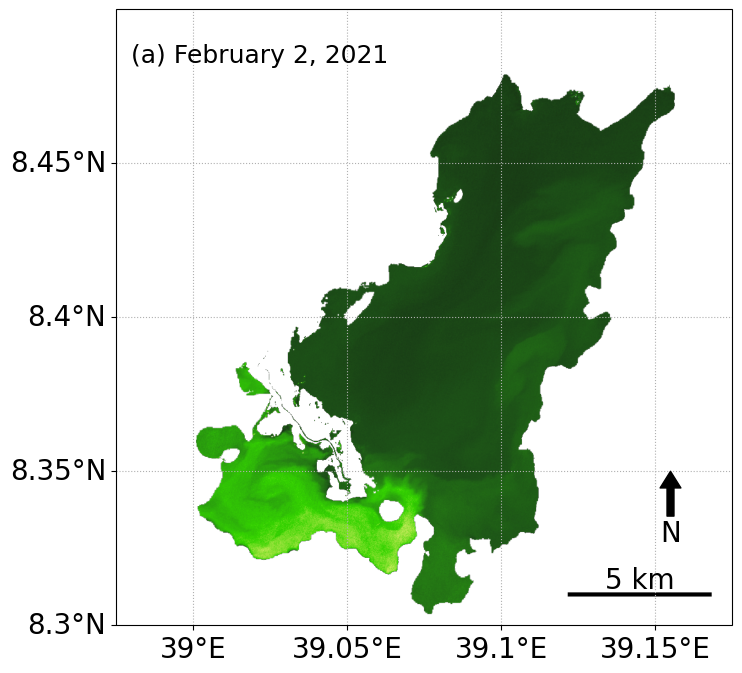

In [58]:
# Dry season, 2021
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

startDate = '2021-02-02'
endDate = '2021-02-03'

S2_BANDS_2 = ['B12', 'B11', 'B8', 'B3', 'B4', 'B5', 'B6', 'B2', 'QA60', 'water']

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
    .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)

updatedMaskedImage = withWater.select(S2_BANDS_2)

ChlaVisParam={
    'min':0,
    'max':0.3,
    'palette':['152E13', '183815', '1A4216', '1C4D17', '1E5817', '206416', '237015', '257D14', '278A12', '29980F', '2BA60C', '2EB509', '31C405', '34D400', '71DD22', 'A5E544', 'D0EC66']
};
, 
equation = "1.0*((RED2-RED1)/(RED2+RED1))"
Chla = updatedMaskedImage.expression(equation,
    {'RED2':updatedMaskedImage.select('B5'),'RED1':updatedMaskedImage.select('B4')})


mask = withWater.select('water').gt(0);
LakeWaterMask = updatedMaskedImage.updateMask(mask)
ChlaMask = Chla.updateMask(mask).clip(fc_largest.geometry());

region = [39.175, 8.3, 38.975, 8.5]

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(ChlaMask, region=region, vis_params=ChlaVisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

ax.text(38.98, 8.485, "(a) February 2, 2021", fontsize=18,
            verticalalignment='center', horizontalalignment='left')

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black",
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05), color="black", unit="km"
)

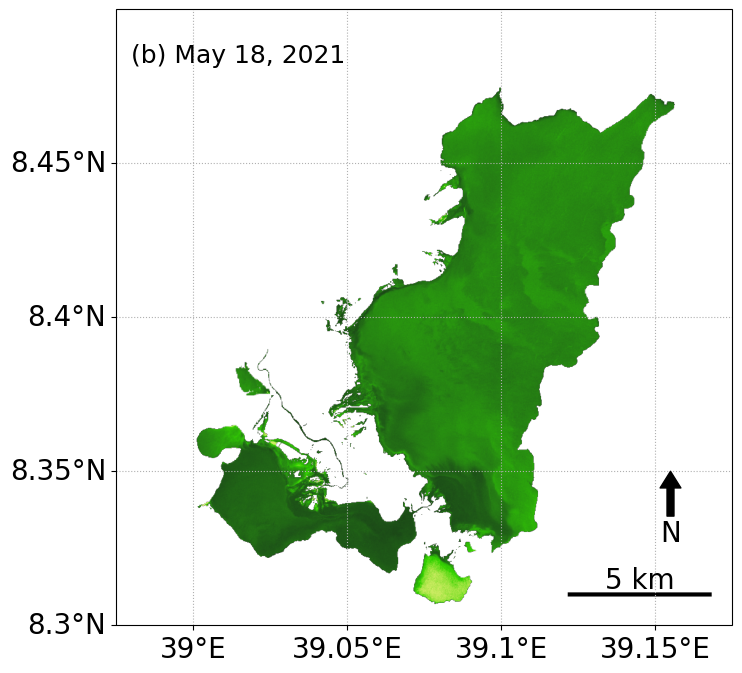

In [59]:
# Minor Wet season, 2021

startDate = '2021-05-18'
endDate = '2021-05-19'

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
    .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

Chla = updatedMaskedImage.expression(equation,
    {'RED2':updatedMaskedImage.select('B5'),'RED1':updatedMaskedImage.select('B4')})


mask = withWater.select('water').gt(0);
LakeWaterMask = updatedMaskedImage.updateMask(mask)
ChlaMask = Chla.updateMask(mask).clip(fc_largest.geometry());

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(ChlaMask, region=region, vis_params=ChlaVisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

ax.text(38.98, 8.485, "(b) May 18, 2021", fontsize=18,
            verticalalignment='center', horizontalalignment='left')

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black",
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05),  color="black", unit="km"
)

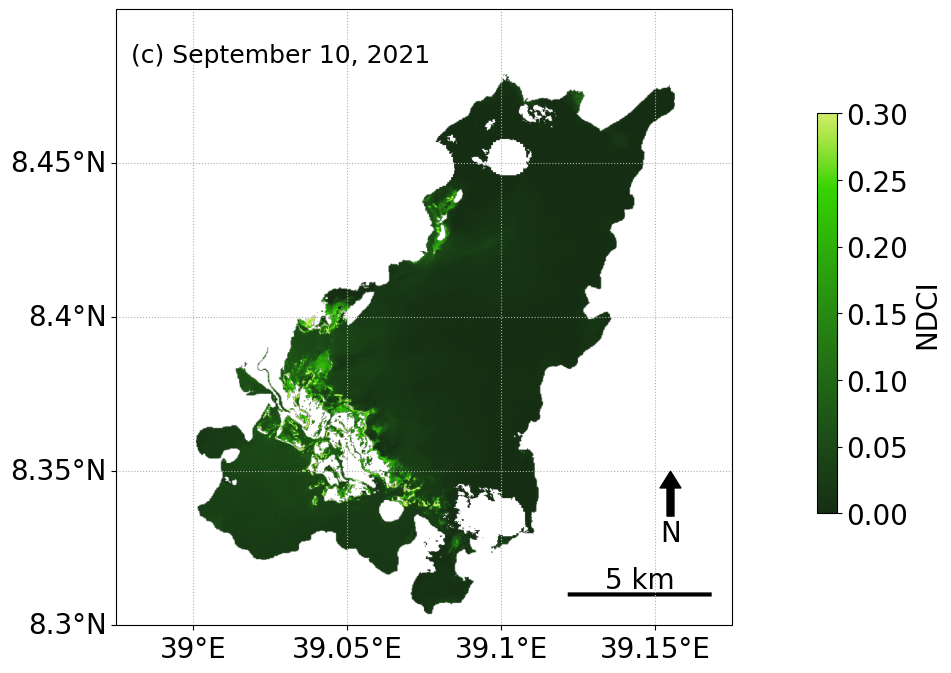

In [60]:
# Heavy rainy season
startDate = '2021-09-10'
endDate = '2021-09-11'

Sen2ImageCollection = ee.ImageCollection('COPERNICUS/S2_SR')\
    .filterBounds(geom)\
    .filterDate(startDate, endDate)\
    .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)\
    .map(cloudMasking_S2_otsu)

withWater = addWater_S2(Sen2ImageCollection, startDate, endDate, bounds)
withWater = withWater.divide(10000)
updatedMaskedImage = withWater.select(S2_BANDS_2)

Chla = updatedMaskedImage.expression(equation,
    {'RED2':updatedMaskedImage.select('B5'),'RED1':updatedMaskedImage.select('B4')})


mask = withWater.select('water').gt(0);
LakeWaterMask = updatedMaskedImage.updateMask(mask)
ChlaMask = Chla.updateMask(mask).clip(fc_largest.geometry());

fig = plt.figure(figsize=(10, 8))
ax = cartoee.get_map(ChlaMask, region=region, vis_params=ChlaVisParam)
cartoee.add_gridlines(ax, interval=[0.05, 0.05], linestyle=":")

ax.text(38.98, 8.485, "(c) September 10, 2021", fontsize=18,
            verticalalignment='center', horizontalalignment='left')

cartoee.add_colorbar(
    ax, ChlaVisParam, loc="right", label="NDCI", orientation="vertical"
)

# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.9, 0.25), text_color="black", arrow_color="black",
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=5, xy=(0.85, 0.05),  color="black", unit="km"
)

## Figure 7-a

In [61]:
startDate = '2021-01-01'
endDate = '2021-12-31'

# water
water = ee.Geometry.Point([39.09057754516782,8.393555871425201])

# land
land = ee.Geometry.Point([39.01470321655454,8.420047303334265])

modis = ee.ImageCollection('MODIS/061/MOD11A2')\
    .filterBounds(water)\
    .filterDate(startDate, endDate)\
    .select('LST_Day_1km')

In [62]:
modLSTc = modis.map(Temp_correction);

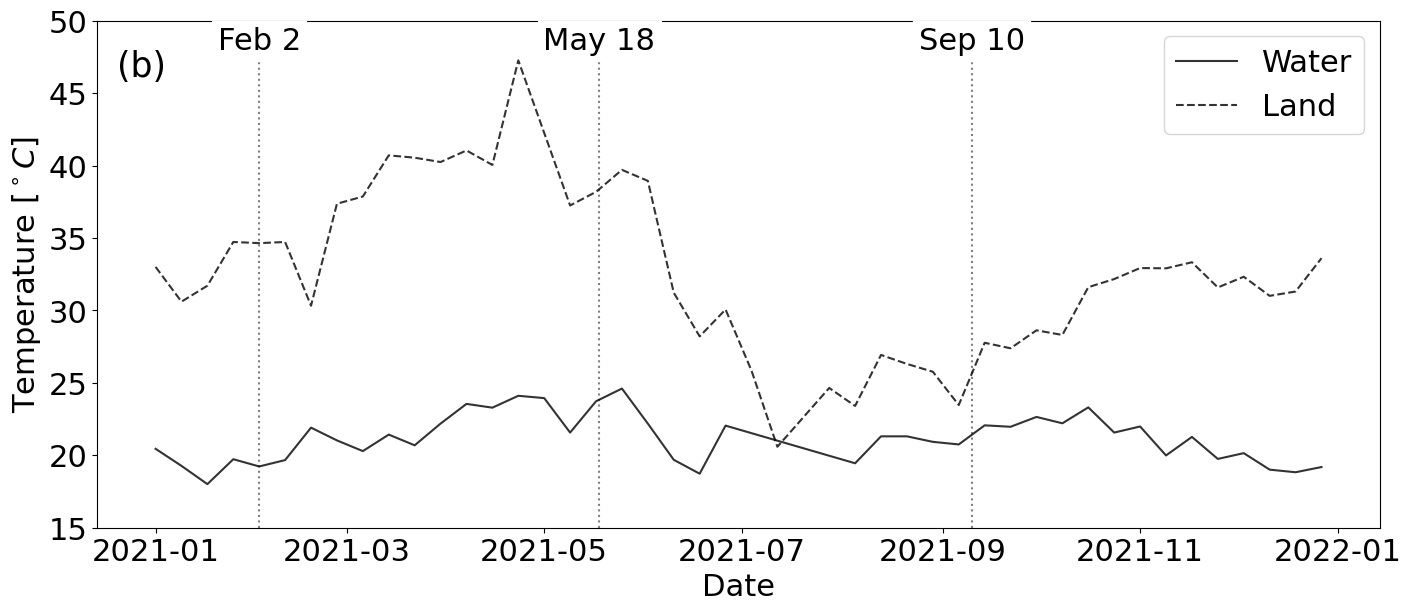

In [63]:
temp_df_water = dataframe_prod_temp(modLSTc, water)
temp_df_land = dataframe_prod_temp(modLSTc, land)

dates = pd.to_datetime(['2021-02-02', '2021-05-18', '2021-09-17'])
dates[0]


# Subplots.
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True)

# Add fitting curves.
ax.plot(temp_df_water['datetime'], temp_df_water['LST_Day_1km'],
                   'k-', alpha=0.8, label='Water')
ax.plot(temp_df_land['datetime'], temp_df_land['LST_Day_1km'],
                   'k--', alpha=0.8, label='Land')

dates = pd.to_datetime(['2021-02-02', '2021-05-18', '2021-09-10', '2020-12-20'])

ax.axvline(dates[0], c='k', ls=':', alpha=0.5)
ax.text(dates[0], 48,'Feb 2', ha="center", backgroundcolor='white')

ax.axvline(dates[1], c='k', ls=':', alpha=0.5)
ax.text(dates[1], 48,'May 18', ha="center", backgroundcolor='white')

ax.axvline(dates[2], c='k', ls=':', alpha=0.5)
ax.text(dates[2], 48,'Sep 10', ha="center", backgroundcolor='white')

ax.text(dates[3], 48, "(b)", ha="left", va="top", size=25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature [$^\circ C$]')
ax.set_ylim(15, 50)
ax.legend();

## Figure 7-b

In [64]:
GSMaP = ee.ImageCollection('JAXA/GPM_L3/GSMaP/v6/operational')\
.filterBounds(geom)\
.filter(ee.Filter.date('2021-01-01', '2021-12-31'))\
.select('hourlyPrecipRate')

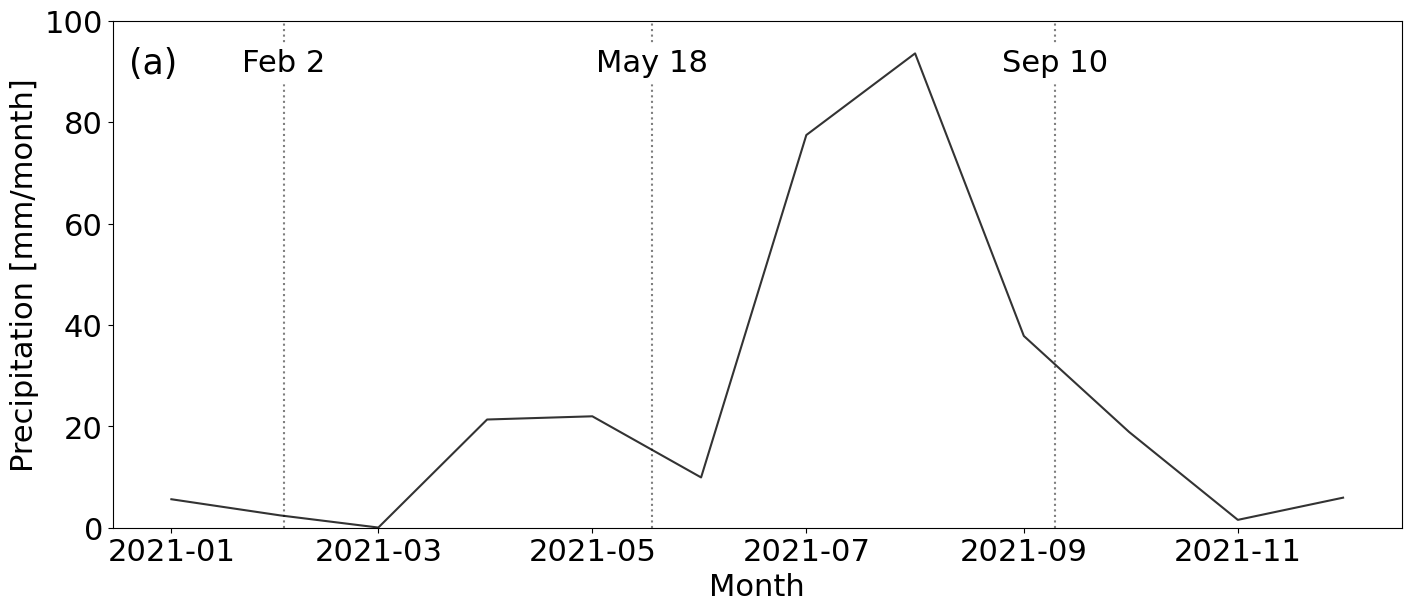

In [65]:
precipi_df = precipi_dataframe_prod(GSMaP, geom)
precipi_df = precipi_df[['DOY', 'Month', 'hourlyPrecipRate']]
precipi_df = precipi_df.groupby('DOY').agg('sum')

precipi_df['Precip-mm/day'] = precipi_df['hourlyPrecipRate']


precipi_df_sub_monthly = precipi_df.groupby('Month').agg('sum')

precipi_df_sub_monthly['Precip-mm/month'] = precipi_df_sub_monthly['hourlyPrecipRate']

plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(14, 6),constrained_layout=True)

datelist = pd.date_range(datetime(2021,1,1), datetime(2021,12,31), freq="MS").tolist()
df = pd.DataFrame({'Date': datelist})


ax.plot(df['Date'], precipi_df_sub_monthly['Precip-mm/day'],
                   'k-', alpha=0.8)

dates = pd.to_datetime(['2021-02-02', '2021-05-18', '2021-09-10', '2020-12-20'])

ax.axvline(dates[0], c='k', ls=':', alpha=0.5)
ax.text(dates[0], 90,'Feb 2', ha="center", backgroundcolor='white')

ax.axvline(dates[1], c='k', ls=':', alpha=0.5)
ax.text(dates[1], 90,'May 18', ha="center", backgroundcolor='white')

ax.axvline(dates[2], c='k', ls=':', alpha=0.5)
ax.text(dates[2], 90,'Sep 10', ha="center", backgroundcolor='white')

ax.text(dates[3], 95, "(a)", ha="left", va="top", size=25)

ax.set_xlabel('Month')
ax.set_ylabel('Precipitation [mm/month]')
ax.set_ylim(-0, 100);